**List of Noteable Variables in this Workbook**

- combined_df : dataset dataframe after removing duplication 
- drop_df : dataset dataframe after removing duplication  
- drop_df_removed_shift : dataset dataframe after removing duplication + shifted rows  

For Unique Tag Items & their Categories,
- geography_categories : Geography
- investment_categories : Investment
- industry_categories : Industry  

For Dataset Dataframe after One Hot Encoding,
- dataset_encoded_1 : dataset after (removing duplication + shifted rows) + encode geography categories
- dataset_encoded_2 : dataset_encoded_1 + encode investment categories
- dataset_encoded_3 : dataset_encoded_2 + encode industry categories   --> Final dataframe for One Hot Encoding, use it for further study.

## Import Data & Data Preprocessing

In [284]:
import pandas as pd

In [285]:
import numpy as np
import os

In [286]:
#pip install pyarrow
#pip install fastparquet

**1. Remove Duplication**

Step 1: remove duplicate iteration  
(third line of code) The variable "files" inside pd.read_parquet() of the original file is revised to "file" .

In [287]:
num_files = 15
files = [f"files/batch_{i}.parquet" for i in range(num_files)]

dfs = [pd.read_parquet(file) for file in files]
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,Investors,Primary Contact,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags
0,Techstars,David Cohen,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t..."
1,Y Combinator,David Lieb,"Founded in 25, Y Combinator is an accelerator ...","Africa, Americas, Asia, Europe, Oceania, Unite...","Biotechnology, Commercial Transportation, Comm...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, europe, oceania, unit...","[accelerator/incubator, early stage vc, later ...","[biotechnology, commercial transportation, com..."
2,Plug and Play Tech Center,Marc Steiner,"Founded in 26, Plug and Play Tech Center is an...","Africa, Americas, Asia, Canada, Europe, Middle...","Aerospace and Defense, Animal Husbandry, Aquac...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, europe, middl...","[accelerator/incubator, early stage vc, later ...","[aerospace and defense, animal husbandry, aqua..."
3,Gaingels,Paul Grossinger,"Founded in 214, Gaingels is a venture capital ...","Africa, Americas, Asia, Canada, Europe, Middle...","Business Products and Services (B2B), Consumer...","Early Stage VC, Later Stage VC, PE Growth/Expa...",Venture Capital,"[africa, americas, asia, canada, europe, middl...","[early stage vc, later stage vc, pe growth/exp...","[business products and services (b2b), consume..."
4,Antler,Magnus Grimeland,"Founded in 217, Antler is a venture capital in...","Australia, Brazil, Canada, China, Denmark, Est...","Agriculture, Business Products and Services (B...","Accelerator/Incubator, Early Stage VC, Seed Round",Venture Capital,"[australia, brazil, canada, china, denmark, es...","[accelerator/incubator, early stage vc, seed r...","[agriculture, business products and services (..."
...,...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Imran Jooma,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,[],"[add-on, buyout/lbo, merger/acquisition]","[commercial products, transportation]"
155340,ECSEL JU,0,,,"Semiconductors, Software",0,0,[],[0],"[semiconductors, software]"
155341,Ecster,0,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]
155342,ECU Health,Michael Waldrum,,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]


Step 2: checking all other possible duplications (rows with exactly same row values --> found to be 590 number of rows). 

In [288]:
# If values in a column conatains unhashable data e.g. list / ndarray, formula will return error --> last three columns
# Thus, only use columns with hashable types --> subset of other columns
# This formula will return a series of boolean values indicating whether each row is a duplicate, True = Duplicate

check_duplicates = combined_df.duplicated(subset=['Investors', 'Primary Contact', 'Description', 'Geography', 'Preferred Industry', 'Preferred Investment Type', 'Primary Investor Type'])
print( check_duplicates )

print( check_duplicates.sum() )           # Count of duplicates --> 590

0         False
1         False
2         False
3         False
4         False
          ...  
155339    False
155340    False
155341    False
155342    False
155343    False
Length: 155344, dtype: bool
590


In [289]:
duplicates_index_number = check_duplicates[check_duplicates == True]
duplicates_index_number.index

Index([ 11372,  26404,  26415,  26517,  32353,  32422,  32967,  33122,  33561,
        34570,
       ...
       153768, 153769, 153774, 153861, 153899, 154109, 154162, 154866, 154867,
       154873],
      dtype='int64', length=590)

In [290]:
combined_df.drop(index = duplicates_index_number.index, inplace=True)  # Drop duplicates
combined_df

,Investors,Primary Contact,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags
0,Techstars,David Cohen,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t..."
1,Y Combinator,David Lieb,"Founded in 25, Y Combinator is an accelerator ...","Africa, Americas, Asia, Europe, Oceania, Unite...","Biotechnology, Commercial Transportation, Comm...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, europe, oceania, unit...","[accelerator/incubator, early stage vc, later ...","[biotechnology, commercial transportation, com..."
2,Plug and Play Tech Center,Marc Steiner,"Founded in 26, Plug and Play Tech Center is an...","Africa, Americas, Asia, Canada, Europe, Middle...","Aerospace and Defense, Animal Husbandry, Aquac...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, europe, middl...","[accelerator/incubator, early stage vc, later ...","[aerospace and defense, animal husbandry, aqua..."
3,Gaingels,Paul Grossinger,"Founded in 214, Gaingels is a venture capital ...","Africa, Americas, Asia, Canada, Europe, Middle...","Business Products and Services (B2B), Consumer...","Early Stage VC, Later Stage VC, PE Growth/Expa...",Venture Capital,"[africa, americas, asia, canada, europe, middl...","[early stage vc, later stage vc, pe growth/exp...","[business products and services (b2b), consume..."
4,Antler,Magnus Grimeland,"Founded in 217, Antler is a venture capital in...","Australia, Brazil, Canada, China, Denmark, Est...","Agriculture, Business Products and Services (B...","Accelerator/Incubator, Early Stage VC, Seed Round",Venture Capital,"[australia, brazil, canada, china, denmark, es...","[accelerator/incubator, early stage vc, seed r...","[agriculture, business products and services (..."
...,...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Imran Jooma,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,[],"[add-on, buyout/lbo, merger/acquisition]","[commercial products, transportation]"
155340,ECSEL JU,0,,,"Semiconductors, Software",0,0,[],[0],"[semiconductors, software]"
155341,Ecster,0,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]
155342,ECU Health,Michael Waldrum,,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]


Step 3: Check duplication for same investor inputs

In [291]:
check_duplicates_2 = combined_df.duplicated(subset=['Investors', 'Description'])
print(check_duplicates_2)
print( check_duplicates_2.sum() )                 # Count of duplicates --> 15044

0         False
1         False
2         False
3         False
4         False
          ...  
155339    False
155340    False
155341    False
155342    False
155343    False
Length: 154754, dtype: bool
15044


In [292]:
duplicates_index_number_2 = check_duplicates_2[check_duplicates_2 == True]
duplicates_index_number_2.index

Index([  1674,   1835,   1837,   1840,   1841,   1842,   1843,   1845,   1847,
         1855,
       ...
       155283, 155286, 155301, 155307, 155309, 155312, 155314, 155317, 155327,
       155331],
      dtype='int64', length=15044)

In [293]:
combined_df.drop(index = duplicates_index_number_2.index, inplace=True)  # Drop duplicates
combined_df

,Investors,Primary Contact,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags
0,Techstars,David Cohen,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t..."
1,Y Combinator,David Lieb,"Founded in 25, Y Combinator is an accelerator ...","Africa, Americas, Asia, Europe, Oceania, Unite...","Biotechnology, Commercial Transportation, Comm...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, europe, oceania, unit...","[accelerator/incubator, early stage vc, later ...","[biotechnology, commercial transportation, com..."
2,Plug and Play Tech Center,Marc Steiner,"Founded in 26, Plug and Play Tech Center is an...","Africa, Americas, Asia, Canada, Europe, Middle...","Aerospace and Defense, Animal Husbandry, Aquac...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, europe, middl...","[accelerator/incubator, early stage vc, later ...","[aerospace and defense, animal husbandry, aqua..."
3,Gaingels,Paul Grossinger,"Founded in 214, Gaingels is a venture capital ...","Africa, Americas, Asia, Canada, Europe, Middle...","Business Products and Services (B2B), Consumer...","Early Stage VC, Later Stage VC, PE Growth/Expa...",Venture Capital,"[africa, americas, asia, canada, europe, middl...","[early stage vc, later stage vc, pe growth/exp...","[business products and services (b2b), consume..."
4,Antler,Magnus Grimeland,"Founded in 217, Antler is a venture capital in...","Australia, Brazil, Canada, China, Denmark, Est...","Agriculture, Business Products and Services (B...","Accelerator/Incubator, Early Stage VC, Seed Round",Venture Capital,"[australia, brazil, canada, china, denmark, es...","[accelerator/incubator, early stage vc, seed r...","[agriculture, business products and services (..."
...,...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Imran Jooma,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,[],"[add-on, buyout/lbo, merger/acquisition]","[commercial products, transportation]"
155340,ECSEL JU,0,,,"Semiconductors, Software",0,0,[],[0],"[semiconductors, software]"
155341,Ecster,0,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]
155342,ECU Health,Michael Waldrum,,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]


The variable "combined_df" here is updated with all duplicates removed.

**2. Handle Missing Vlue**

In [294]:
# import os
# Define the path to your desktop
#desktop_path = os.path.expanduser("~/Desktop/")

# Define the file path for the CSV file on your desktop
#csv_file_path = os.path.join(desktop_path, 'output.csv')

# Export the DataFrame to a CSV file on your desktop
#combined_df.to_csv(csv_file_path, index=False)

In [295]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139710 entries, 0 to 155343
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Investors                       139710 non-null  object
 1   Primary Contact                 139709 non-null  object
 2   Description                     139710 non-null  object
 3   Geography                       139710 non-null  object
 4   Preferred Industry              139696 non-null  object
 5   Preferred Investment Type       139168 non-null  object
 6   Primary Investor Type           139090 non-null  object
 7   geography_tags                  139710 non-null  object
 8   preferred_investment_type_tags  139710 non-null  object
 9   preferred_industry_tags         139710 non-null  object
dtypes: object(10)
memory usage: 11.7+ MB


In [296]:
combined_df.drop(columns=['Primary Contact'], inplace=True, errors='ignore')

In [297]:
print(combined_df)

                        Investors  \
0                       Techstars   
1                    Y Combinator   
2       Plug and Play Tech Center   
3                        Gaingels   
4                          Antler   
...                           ...   
155339                 ECS Tuning   
155340                   ECSEL JU   
155341                     Ecster   
155342                 ECU Health   
155343              ECU Worldwide   

                                              Description  \
0       Founded in 26, Techstars is an accelerator bas...   
1       Founded in 25, Y Combinator is an accelerator ...   
2       Founded in 26, Plug and Play Tech Center is an...   
3       Founded in 214, Gaingels is a venture capital ...   
4       Founded in 217, Antler is a venture capital in...   
...                                                   ...   
155339  Manufacturer and distributor of automotive par...   
155340                                                      
155341

In [298]:
combined_df.isnull().sum()

Investors                           0
Description                         0
Geography                           0
Preferred Industry                 14
Preferred Investment Type         542
Primary Investor Type             620
geography_tags                      0
preferred_investment_type_tags      0
preferred_industry_tags             0
dtype: int64

In [299]:
# drop_df = combined_df.dropna()

In [300]:
# drop_df

In [301]:
# drop_df.info()

In [302]:
# drop_df.columns

In [303]:
# drop_df.isin(['', '0', '[]', '[0]'])

In [304]:
# drop_df.isin(['', '0', '[]', '[0]']).any(axis=1)

In [305]:
# ~drop_df.isin(['', '0', '[]', '[0]']).any(axis=1)

In [306]:
# drop_df = drop_df[~drop_df.isin(['', '0', '[]', '[0]']).any(axis=1)]

In [307]:
# data1 = {
#     'Category': ['A', 'B', 'A', 'C', 'B']
# }

# df3 = pd.DataFrame(data1)

# # Convert the categorical column 'Category' into dummy variables
# dummy_df = pd.get_dummies(df3['Category'], prefix='Category')

# # Concatenate the dummy variables with the original DataFrame
# df3 = pd.concat([df3, dummy_df], axis=1)

# df3

In [308]:
# drop_df

In [309]:
# drop_df.info()

# # import os
# # Define the path to your desktop
# desktop_path = os.path.expanduser("~/Desktop/")

# # Define the file path for the CSV file on your desktop
# csv_file_path = os.path.join(desktop_path, 'output2.csv')

# # Export the DataFrame to a CSV file on your desktop
# drop_df.to_csv(csv_file_path, index=False)

Client prefer to keep rows with missing value. Thus above codes are changed to comments.

In [310]:
drop_df = combined_df
drop_df

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t..."
1,Y Combinator,"Founded in 25, Y Combinator is an accelerator ...","Africa, Americas, Asia, Europe, Oceania, Unite...","Biotechnology, Commercial Transportation, Comm...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, europe, oceania, unit...","[accelerator/incubator, early stage vc, later ...","[biotechnology, commercial transportation, com..."
2,Plug and Play Tech Center,"Founded in 26, Plug and Play Tech Center is an...","Africa, Americas, Asia, Canada, Europe, Middle...","Aerospace and Defense, Animal Husbandry, Aquac...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, europe, middl...","[accelerator/incubator, early stage vc, later ...","[aerospace and defense, animal husbandry, aqua..."
3,Gaingels,"Founded in 214, Gaingels is a venture capital ...","Africa, Americas, Asia, Canada, Europe, Middle...","Business Products and Services (B2B), Consumer...","Early Stage VC, Later Stage VC, PE Growth/Expa...",Venture Capital,"[africa, americas, asia, canada, europe, middl...","[early stage vc, later stage vc, pe growth/exp...","[business products and services (b2b), consume..."
4,Antler,"Founded in 217, Antler is a venture capital in...","Australia, Brazil, Canada, China, Denmark, Est...","Agriculture, Business Products and Services (B...","Accelerator/Incubator, Early Stage VC, Seed Round",Venture Capital,"[australia, brazil, canada, china, denmark, es...","[accelerator/incubator, early stage vc, seed r...","[agriculture, business products and services (..."
...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,[],"[add-on, buyout/lbo, merger/acquisition]","[commercial products, transportation]"
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],[0],"[semiconductors, software]"
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]
155342,ECU Health,,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]


**3. Remove shifted data.**

Step 1: Check shift by checking "www." in the column "Description" and remove

In [311]:
df_removed_shifted = drop_df[['Description']][drop_df['Description'].str.contains('www.')]
df_removed_shifted

,Description
94,www.aceandcompany.com
118,www.hf.com
251,www.nhqv.com
338,www.tdpfund.com
406,www.bdtmsd.com
...,...
155013,www.bebig.com
155014,www.ezag.com
155016,www.eckertseamans.com
155059,www.ecooilandgas.com


In [312]:
index_list_removed_shifted = df_removed_shifted.index.tolist()
index_list_removed_shifted

[94,
 118,
 251,
 338,
 406,
 437,
 536,
 544,
 551,
 665,
 761,
 1138,
 1309,
 1382,
 1671,
 1672,
 1700,
 1809,
 1826,
 1828,
 1829,
 1831,
 1833,
 1834,
 1836,
 1838,
 1839,
 1844,
 1846,
 1848,
 1849,
 1850,
 1851,
 1853,
 1859,
 1860,
 1861,
 1862,
 1863,
 1864,
 1865,
 1866,
 1867,
 1869,
 1870,
 1871,
 1872,
 1873,
 1874,
 1875,
 1906,
 1912,
 1913,
 1916,
 1926,
 1930,
 1935,
 1942,
 1948,
 1950,
 1951,
 1959,
 1960,
 1965,
 1974,
 1985,
 1996,
 2006,
 2011,
 2013,
 2109,
 2158,
 2171,
 2182,
 2199,
 2210,
 2266,
 2275,
 2366,
 2437,
 2558,
 2590,
 2627,
 2628,
 2690,
 2711,
 2714,
 2737,
 2766,
 2800,
 2972,
 3092,
 3246,
 3250,
 3265,
 3273,
 3323,
 3356,
 3596,
 3626,
 3717,
 3769,
 3818,
 3854,
 4110,
 4141,
 4264,
 4265,
 4266,
 4291,
 4402,
 4827,
 4918,
 5059,
 5077,
 5087,
 5146,
 5276,
 5321,
 5372,
 5434,
 5593,
 5598,
 5734,
 5737,
 5741,
 5749,
 5762,
 5764,
 5767,
 5780,
 5790,
 5809,
 5852,
 5858,
 5900,
 6016,
 6040,
 6042,
 6059,
 6145,
 6270,
 6340,
 6341,
 635

Drop shifted rows and store in a new dataframe "drop_df_removed_shift"

In [313]:
drop_df_removed_shift = drop_df.drop(index= index_list_removed_shifted )
drop_df_removed_shift

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t..."
1,Y Combinator,"Founded in 25, Y Combinator is an accelerator ...","Africa, Americas, Asia, Europe, Oceania, Unite...","Biotechnology, Commercial Transportation, Comm...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, europe, oceania, unit...","[accelerator/incubator, early stage vc, later ...","[biotechnology, commercial transportation, com..."
2,Plug and Play Tech Center,"Founded in 26, Plug and Play Tech Center is an...","Africa, Americas, Asia, Canada, Europe, Middle...","Aerospace and Defense, Animal Husbandry, Aquac...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, europe, middl...","[accelerator/incubator, early stage vc, later ...","[aerospace and defense, animal husbandry, aqua..."
3,Gaingels,"Founded in 214, Gaingels is a venture capital ...","Africa, Americas, Asia, Canada, Europe, Middle...","Business Products and Services (B2B), Consumer...","Early Stage VC, Later Stage VC, PE Growth/Expa...",Venture Capital,"[africa, americas, asia, canada, europe, middl...","[early stage vc, later stage vc, pe growth/exp...","[business products and services (b2b), consume..."
4,Antler,"Founded in 217, Antler is a venture capital in...","Australia, Brazil, Canada, China, Denmark, Est...","Agriculture, Business Products and Services (B...","Accelerator/Incubator, Early Stage VC, Seed Round",Venture Capital,"[australia, brazil, canada, china, denmark, es...","[accelerator/incubator, early stage vc, seed r...","[agriculture, business products and services (..."
...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,[],"[add-on, buyout/lbo, merger/acquisition]","[commercial products, transportation]"
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],[0],"[semiconductors, software]"
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]
155342,ECU Health,,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]


Step 2: Check shift by checking ending with ".com" in the column "Description" , and remove

In [314]:
df_removed_shifted_2 = drop_df_removed_shift[drop_df_removed_shift['Description'].str.endswith('.com', na=False)]
df_removed_shifted_2

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags
545,Anderson Lock &amp,andersonlockandsafe.com,Anderson Lock &amp; Safe is a provider of Lock...,0,0,Merger/Acquisition,[anderson lock &amp; safe is a provider of loc...,[0],[0]
1133,Italian Food &amp,ifbcorp.com,Operator of an investment holding company. The...,0,"Consumer Non-Durables, Retail, Software",Merger/Acquisition,[operator of an investment holding company. th...,"[consumer non-durables, retail, software]",[0]
1852,J&amp,jnmpartners.com,"Founded 221, J&amp;M Partners is a private equ...",0,0,"Buyout/LBO, Early Stage VC, Later Stage VC, PE...","[founded 221, j&amp;m partners is a private eq...",[0],[0]
1854,J&amp,jnpef.com,"Founded in 218, J&amp; Private Equity is a pri...",0,0,"Buyout/LBO, Later Stage VC, PE Growth/Expansion","[founded in 218, j&amp; private equity is a pr...",[0],[0]
1856,J&amp,jrcollisioncenters.com,,0,Transportation,Merger/Acquisition,[],[transportation],[0]
...,...,...,...,...,...,...,...,...,...
152015,Dr. Lutz &amp,lutz-cie.com,"Founded in 211, Dr. Lutz &amp; Cie is a ventur...",0,0,"Early Stage VC, PE Growth/Expansion, Seed Round","[founded in 211, dr. lutz &amp; cie is a ventu...",[0],[0]
152125,Drake Real Estate &amp,drake-investments.com,"Founded in 212, Drake Real Estate &amp; Invest...",0,0,0,"[founded in 212, drake real estate &amp; inves...",[0],[0]
153734,E &amp,eandiventuresllc.com,"Founded in 216, E &amp; I Ventures is a ventur...",0,Software,"Debt - General, Early Stage VC, Seed Round","[founded in 216, e &amp; i ventures is a ventu...",[software],[0]
153881,E.B. Horsman &amp,ebhorsman.com,,0,"Commercial Products, Computer Hardware",Merger/Acquisition,[],"[commercial products, computer hardware]",[0]


In [315]:
index_list_removed_shifted_2 = df_removed_shifted_2.index.tolist()
index_list_removed_shifted_2

[545,
 1133,
 1852,
 1854,
 1856,
 1901,
 2382,
 2477,
 3178,
 4109,
 4846,
 5553,
 5927,
 6549,
 7067,
 7572,
 7629,
 7938,
 8014,
 8392,
 9433,
 9465,
 9482,
 9694,
 11075,
 11922,
 12057,
 12061,
 12273,
 12455,
 13214,
 13379,
 13393,
 14244,
 15033,
 16474,
 16664,
 17124,
 17330,
 17332,
 17368,
 17435,
 17594,
 17763,
 18469,
 18561,
 18575,
 19557,
 19558,
 19802,
 20440,
 20568,
 20901,
 21102,
 21313,
 21716,
 23809,
 24683,
 27000,
 27499,
 29270,
 30996,
 31323,
 31372,
 32346,
 35361,
 36070,
 36154,
 36482,
 36656,
 36761,
 38340,
 38512,
 38575,
 39117,
 39501,
 39792,
 40276,
 40584,
 41657,
 41704,
 42108,
 43843,
 44912,
 45621,
 45714,
 46853,
 47320,
 47974,
 48538,
 48684,
 48940,
 49223,
 51086,
 51258,
 52801,
 53163,
 53170,
 53178,
 53246,
 53405,
 54033,
 54497,
 55224,
 55686,
 56867,
 57309,
 57854,
 57882,
 58020,
 58248,
 58287,
 59834,
 59853,
 61109,
 61412,
 61543,
 62274,
 62295,
 62480,
 62748,
 62892,
 64843,
 65283,
 67046,
 67954,
 68801,
 70038,
 

In [316]:
drop_df_removed_shift = drop_df_removed_shift.drop(index= index_list_removed_shifted_2 )
drop_df_removed_shift

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t..."
1,Y Combinator,"Founded in 25, Y Combinator is an accelerator ...","Africa, Americas, Asia, Europe, Oceania, Unite...","Biotechnology, Commercial Transportation, Comm...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, europe, oceania, unit...","[accelerator/incubator, early stage vc, later ...","[biotechnology, commercial transportation, com..."
2,Plug and Play Tech Center,"Founded in 26, Plug and Play Tech Center is an...","Africa, Americas, Asia, Canada, Europe, Middle...","Aerospace and Defense, Animal Husbandry, Aquac...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, europe, middl...","[accelerator/incubator, early stage vc, later ...","[aerospace and defense, animal husbandry, aqua..."
3,Gaingels,"Founded in 214, Gaingels is a venture capital ...","Africa, Americas, Asia, Canada, Europe, Middle...","Business Products and Services (B2B), Consumer...","Early Stage VC, Later Stage VC, PE Growth/Expa...",Venture Capital,"[africa, americas, asia, canada, europe, middl...","[early stage vc, later stage vc, pe growth/exp...","[business products and services (b2b), consume..."
4,Antler,"Founded in 217, Antler is a venture capital in...","Australia, Brazil, Canada, China, Denmark, Est...","Agriculture, Business Products and Services (B...","Accelerator/Incubator, Early Stage VC, Seed Round",Venture Capital,"[australia, brazil, canada, china, denmark, es...","[accelerator/incubator, early stage vc, seed r...","[agriculture, business products and services (..."
...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,[],"[add-on, buyout/lbo, merger/acquisition]","[commercial products, transportation]"
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],[0],"[semiconductors, software]"
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]
155342,ECU Health,,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]


Step 3: Check shift by checking ending with ".org" in the column "Description" , and remove

In [317]:
df_removed_shifted_3 = drop_df_removed_shift[drop_df_removed_shift['Description'].str.endswith('.org', na=False)]
df_removed_shifted_3

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags
8460,JSSATE - Science &amp,jssstepnoida.org,JSSATE - Science &amp; Technology Entrepreneur...,0,Software,Accelerator/Incubator,[jssate - science &amp; technology entrepreneu...,[software],[0]
22647,Eli &amp,broadfoundation.org,Eli &amp; Edythe Broad Foundation is an indepe...,0,Services (Non-Financial),0,[eli &amp; edythe broad foundation is an indep...,[services (non-financial)],[0]
60934,Hope &amp,makefoodyourbusiness.org,"Founded in 214, Hope &amp; Main is an incubato...",0,Consumer Non-Durables,"Accelerator/Incubator, Early Stage VC, Seed Round","[founded in 214, hope &amp; main is an incubat...",[consumer non-durables],[0]
68343,Innovation &amp,accelerator.childrenshospital.org,Innovation &amp; Digital Health Accelerator is...,0,"Healthcare Technology Systems, Other Healthcare",Accelerator/Incubator,[innovation &amp; digital health accelerator i...,"[healthcare technology systems, other healthcare]",[0]
71960,Waggies By Maggie And Friends,waggies.org,providing meaningful employment to persons wit...,None,legal services,None,[providing meaningful employment to persons wi...,[legal services],[]
117324,The West Coast Consortium for Technology &amp,westcoastctip.org,"Founded in 211, The West Coast Consortium for ...",United States,"Healthcare Devices and Supplies, Healthcare Te...",Accelerator/Incubator,"[founded in 211, the west coast consortium for...","[healthcare devices and supplies, healthcare t...",[united states]
118319,Boys &amp,bgcmla.org,Boys and Girls Clubs of Metro Los Angeles is a...,0,0,Merger/Acquisition,[boys and girls clubs of metro los angeles is ...,[0],[0]


In [318]:
index_list_removed_shifted_3 = df_removed_shifted_3.index.tolist()
index_list_removed_shifted_3

[8460, 22647, 60934, 68343, 71960, 117324, 118319]

In [319]:
drop_df_removed_shift = drop_df_removed_shift.drop(index= index_list_removed_shifted_3 )
drop_df_removed_shift

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t..."
1,Y Combinator,"Founded in 25, Y Combinator is an accelerator ...","Africa, Americas, Asia, Europe, Oceania, Unite...","Biotechnology, Commercial Transportation, Comm...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, europe, oceania, unit...","[accelerator/incubator, early stage vc, later ...","[biotechnology, commercial transportation, com..."
2,Plug and Play Tech Center,"Founded in 26, Plug and Play Tech Center is an...","Africa, Americas, Asia, Canada, Europe, Middle...","Aerospace and Defense, Animal Husbandry, Aquac...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, europe, middl...","[accelerator/incubator, early stage vc, later ...","[aerospace and defense, animal husbandry, aqua..."
3,Gaingels,"Founded in 214, Gaingels is a venture capital ...","Africa, Americas, Asia, Canada, Europe, Middle...","Business Products and Services (B2B), Consumer...","Early Stage VC, Later Stage VC, PE Growth/Expa...",Venture Capital,"[africa, americas, asia, canada, europe, middl...","[early stage vc, later stage vc, pe growth/exp...","[business products and services (b2b), consume..."
4,Antler,"Founded in 217, Antler is a venture capital in...","Australia, Brazil, Canada, China, Denmark, Est...","Agriculture, Business Products and Services (B...","Accelerator/Incubator, Early Stage VC, Seed Round",Venture Capital,"[australia, brazil, canada, china, denmark, es...","[accelerator/incubator, early stage vc, seed r...","[agriculture, business products and services (..."
...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,[],"[add-on, buyout/lbo, merger/acquisition]","[commercial products, transportation]"
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],[0],"[semiconductors, software]"
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]
155342,ECU Health,,,0,Merger/Acquisition,0,[],[merger/acquisition],[0]


**4. Work on One Hot Encoding**

For each tag column, do the below steps individually to avoid duplicates during explode in step 1  
Step 1: extract the unique items in each tag columns, review and categorize in excel  
Step 2: import back the excel file to dataframe, do lookup to the existing dataset dataframe, do one hot encoding after that .  
Step 3: combine the resulting encoding columns to the existing dataset dataframe.

* Extract Tag Column - Geography Tags

In [320]:
geography_tags_list = drop_df_removed_shift['geography_tags'].explode().dropna().unique().tolist()
print("Geography Tags:", geography_tags_list)

df_to_excel = pd.DataFrame(geography_tags_list)
df_to_excel.columns = ['Location']
df_to_excel

Geography Tags: ['africa', 'americas', 'asia', 'canada', 'middle east', 'oceania', 'united kingdom', 'united states', 'europe', 'australia', 'brazil', 'china', 'denmark', 'estonia', 'france', 'germany', 'india', 'indonesia', 'japan', 'kenya', 'malaysia', 'netherlands', 'norway', 'pakistan', 'philippines', 'portugal', 'singapore', 'south korea', 'spain', 'sweden', 'thailand', 'united arab emirates', 'vietnam', '', 'north america', 'central america', 'south america', 'israel', 'ireland', 'bay area', 'mexico', 'new york', 'new york metro', 'costa rica', 'cuba', 'dominica', 'el salvador', 'east asia', 'mid atlantic', 'northeast', 'south asia', 'luxembourg', 'hong kong', 'southeast asia', 'taiwan', 'andorra', 'austria', 'belgium', 'czech republic', 'hungary', 'liechtenstein', 'monaco', 'northern europe', 'poland', 'slovakia', 'slovenia', 'switzerland', 'southern europe', 'western europe', 'midwest', 'southeast', 'west coast', 'eastern europe', 'south', 'northwest', 'southwest', 'new zealand

,Location
0,africa
1,americas
2,asia
3,canada
4,middle east
...,...
3691,indigenous communities transportation infrastr...
3692,etc
3693,providing services and support to clients to m...
3694,operator of a holding company based in niort


In [321]:
%pip install pycountry

import pandas as pd
import zipfile
import io
import requests
import pycountry

Note: you may need to restart the kernel to use updated packages.


In [322]:
# Step 1: 下載並讀取 GeoNames 的城市資料
url = "http://download.geonames.org/export/dump/cities15000.zip"
response = requests.get(url)

if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        with z.open('cities15000.txt') as f:
            columns = [
                'geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude',
                'feature_class', 'feature_code', 'country_code', 'cc2', 'admin1_code',
                'admin2_code', 'admin3_code', 'admin4_code', 'population', 'elevation',
                'dem', 'timezone', 'modification_date'
            ]
            df_geo = pd.read_csv(f, sep='\t', header=None, names=columns)
else:
    raise Exception("GeoNames 資料下載失敗，請檢查網路。")

# Step 2: 建立 地名 ➜ 國家名稱 的對照字典
def get_country_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return None

df_geo['country_name'] = df_geo['country_code'].apply(get_country_name)

# 使用 asciiname 建立城市/地區 對應國家名
location_to_country = dict(zip(df_geo['asciiname'].str.lower(), df_geo['country_name']))

# 加上所有國家名稱的直接對應（像 "Germany" ➜ "Germany"）
for country in pycountry.countries:
    location_to_country[country.name.lower()] = country.name

# Step 3: 建立轉換函數
def standardize_location(value):
    if pd.isna(value):
        return 'N/A'
    name = value.strip().lower()
    return location_to_country.get(name, 'N/A')

# Step 4: 應用到你的 df_to_excel
df_to_excel['Standardized_Country'] = df_to_excel['Location'].apply(standardize_location)

# Step 5: 預覽結果（可省略）
print(df_to_excel[['Location', 'Standardized_Country']])

# Step 6: 儲存結果到 Excel
df_to_excel.to_excel('standardized_locations.xlsx', index=False)

                                               Location Standardized_Country
0                                                africa                  N/A
1                                              americas                  N/A
2                                                  asia          Philippines
3                                                canada               Canada
4                                           middle east                  N/A
...                                                 ...                  ...
3691  indigenous communities transportation infrastr...                  N/A
3692                                                etc                  N/A
3693  providing services and support to clients to m...                  N/A
3694       operator of a holding company based in niort                  N/A
3695  france. the company is involved in fund manage...                  N/A

[3696 rows x 2 columns]


In [323]:
geography_categories = pd.read_excel('Tag Columns Classification.xlsx', sheet_name='geography_tags')
geography_categories

,Location,Standardized_Country,Geography Categories_2nd,Geography Categories_3rd,Geography Categories_by countries
0,serves as managing director at dr. hettich bet...,NaN,Not Relevant,Not Relevant,Not Relevant
1,board member at dimo.,NaN,Not Relevant,Not Relevant,Not Relevant
2,48,NaN,Not Relevant,Not Relevant,Not Relevant
3,65,NaN,Not Relevant,Not Relevant,Not Relevant
4,president at moladin. he is an angel investor.,NaN,Not Relevant,Not Relevant,Not Relevant
...,...,...,...,...,...
3691,gabon,Gabon,Gabon,Gabon,Gabon
3692,florida.,NaN,Florida,Florida,United States
3693,chad,Chad,Chad,Chad,Chad
3694,austria.,NaN,Austria,Austria,Austria


* Extract Tag Column - Preferred Investment Type Tags

Extract all the unique items in the column to excel file and review manually

In [324]:
investment_tags = pd.Series( drop_df_removed_shift['preferred_investment_type_tags'].explode().unique().tolist() )

# To output an excel file, remove the # sign in the next line 
investment_tags.to_excel('preferred_investment_type_tags.xlsx', index=False, header=['Preferred Investment Type Tags'])

After manual review, import the respective excel worksheet

In [325]:
investment_categories = pd.read_excel('Tag Columns Classification.xlsx', sheet_name='preferred_investment_type_tags')
investment_categories

,Preferred Investment Type Tags,Investment Categories
0,accelerator/incubator,Accelerator/incubator
1,early stage vc,Venture capital
2,later stage vc,Venture capital
3,seed round,Seed round
4,pe growth/expansion,Private equity
...,...,...
401,served as non-executive director at unith. he ...,Not relevant
402,new york,Not relevant
403,aluminum cans,Not relevant
404,building refurbishment,Not relevant


* Extract Tag Column - Preferred Industry Tags

Extract all the unique items in the column to excel file and review manually

In [326]:
industry_tags = pd.Series( drop_df_removed_shift['preferred_industry_tags'].explode().unique().tolist() )        

# To output an excel file, remove the # sign in the next line 
industry_tags.to_excel('preferred_industry_tags.xlsx', index=False, header=['preferred_industry_tags'])      

industry_tags

0                                               beverages
1                                       computer hardware
2                   education and training services (b2b)
3                 educational and training services (b2c)
4                                                  energy
                              ...                        
1002    serves as interim chief executive officer and ...
1003    chief growth officer at mighty (business/produ...
1004                                 advisor at foody.vn.
1005    chief operating officer at cheezburger. he has...
1006     safety products for organizations across canada.
Length: 1007, dtype: object

After manual review, import the respective excel worksheet

In [327]:
industry_categories = pd.read_excel('Tag Columns Classification.xlsx', sheet_name='preferred_industry_tags')
industry_categories = industry_categories.loc[:,'preferred_industry_tags':'industries categories']
industry_categories

,preferred_industry_tags,industries categories
0,animal husbandry,Agriculture
1,aquaculture,Agriculture
2,forestry,Agriculture
3,agriculture,Agriculture
4,other agriculture,Agriculture
...,...,...
1002,road,Trade & Logistics
1003,supply chain and storage,Trade & Logistics
1004,wholesale,Trade & Logistics
1005,rail transportation,Trade & Logistics


**Do lookup after all three categories are done**

1.1 Merge geography categories into dataset dataframe

In [328]:
# Explode the tags so each tag is in its own row
exploded_geography = drop_df_removed_shift.explode('geography_tags')
# Merge will reset the index number, this step is to keep the index order after explosion
exploded_geography_index = exploded_geography.index


# Merge on the exploded tags
drop_df_removed_shift_1 = exploded_geography.merge(
	geography_categories,
	left_on='geography_tags',
	right_on='Location',
	how='left'
)
# This step is to restore the index order after explosion
drop_df_removed_shift_1.index = exploded_geography_index
drop_df_removed_shift_1

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags,Location,Standardized_Country,Geography Categories_2nd,Geography Categories_3rd,Geography Categories_by countries
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,africa,"[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",africa,NaN,Africa,Africa,Africa
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,americas,"[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",americas,NaN,Americas,Americas,Americas
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,asia,"[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",asia,Philippines,Asia,Asia,Asia
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,canada,"[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",canada,Canada,Canada,Canada,Canada
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,middle east,"[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",middle east,NaN,Middle East,Middle East,Not Relevant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,,"[add-on, buyout/lbo, merger/acquisition]","[commercial products, transportation]",NaN,NaN,NaN,NaN,NaN
155340,ECSEL JU,,,"Semiconductors, Software",0,0,,[0],"[semiconductors, software]",NaN,NaN,NaN,NaN,NaN
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,,[merger/acquisition],[0],NaN,NaN,NaN,NaN,NaN
155342,ECU Health,,,0,Merger/Acquisition,0,,[merger/acquisition],[0],NaN,NaN,NaN,NaN,NaN


1.2 One-hot encoding for Geography Tags

In [329]:
drop_df_removed_shift_1_encoded = pd.get_dummies(drop_df_removed_shift_1, columns=['Geography Categories_by countries'])

# In case you want to check the columns of the DataFrame after encoding, remove the # sign in the next lines
a = pd.DataFrame(drop_df_removed_shift_1_encoded.columns.to_list())
a.to_csv('columns_list_geography.csv', index=False)

drop_df_removed_shift_1_encoded

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags,Location,...,Geography Categories_by countries_United States,Geography Categories_by countries_Uruguay,Geography Categories_by countries_Uzbekistan,Geography Categories_by countries_Vanuatu,Geography Categories_by countries_Vietnam,Geography Categories_by countries_Wallis and Futuna,Geography Categories_by countries_Western Sahara,Geography Categories_by countries_Yemen,Geography Categories_by countries_Zambia,Geography Categories_by countries_Zimbabwe
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,africa,"[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",africa,...,False,False,False,False,False,False,False,False,False,False
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,americas,"[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",americas,...,False,False,False,False,False,False,False,False,False,False
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,asia,"[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",asia,...,False,False,False,False,False,False,False,False,False,False
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,canada,"[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",canada,...,False,False,False,False,False,False,False,False,False,False
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,middle east,"[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",middle east,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,,"[add-on, buyout/lbo, merger/acquisition]","[commercial products, transportation]",NaN,...,False,False,False,False,False,False,False,False,False,False
155340,ECSEL JU,,,"Semiconductors, Software",0,0,,[0],"[semiconductors, software]",NaN,...,False,False,False,False,False,False,False,False,False,False
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,,[merger/acquisition],[0],NaN,...,False,False,False,False,False,False,False,False,False,False
155342,ECU Health,,,0,Merger/Acquisition,0,,[merger/acquisition],[0],NaN,...,False,False,False,False,False,False,False,False,False,False


Combine rows with same index to count the number of investment types for each row.  
Note that other columns are aggregated with duplicate texts!  
Thus, only those columns encoded will be extracted at the end, which will further combine to the original dataset dataframe later.

In [330]:
# Note other columns are aggregated with duplicate texts after groupby in this code.
drop_df_removed_shift_1_encoded.groupby(level=0).sum()

# To extract only those encoding columns, to solve the aggregation issue:
geography_encode_columns = drop_df_removed_shift_1_encoded.groupby(level=0).sum().loc[:,"Geography Categories_by countries_Afghanistan":"Geography Categories_by countries_Zimbabwe"]
geography_encode_columns

,Geography Categories_by countries_Afghanistan,Geography Categories_by countries_Africa,Geography Categories_by countries_Africa And Other Regions,Geography Categories_by countries_Albania,Geography Categories_by countries_Algeria,Geography Categories_by countries_Americas,Geography Categories_by countries_Andorra,Geography Categories_by countries_Angola,Geography Categories_by countries_Antigua and Barbuda,Geography Categories_by countries_Argentina,...,Geography Categories_by countries_United States,Geography Categories_by countries_Uruguay,Geography Categories_by countries_Uzbekistan,Geography Categories_by countries_Vanuatu,Geography Categories_by countries_Vietnam,Geography Categories_by countries_Wallis and Futuna,Geography Categories_by countries_Western Sahara,Geography Categories_by countries_Yemen,Geography Categories_by countries_Zambia,Geography Categories_by countries_Zimbabwe
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Combine the encoded columns to the original dataset dataframe

In [331]:
dataset_encoded_1 = drop_df_removed_shift.merge(
    geography_encode_columns,
    left_index=True,
    right_index=True,
    how='inner'
)

dataset_encoded_1

# To output an excel file, remove the # sign in the next line
# dataset_encoded_1.to_excel('dataset_encoded_1.xlsx', index=False)

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags,Geography Categories_by countries_Afghanistan,...,Geography Categories_by countries_United States,Geography Categories_by countries_Uruguay,Geography Categories_by countries_Uzbekistan,Geography Categories_by countries_Vanuatu,Geography Categories_by countries_Vietnam,Geography Categories_by countries_Wallis and Futuna,Geography Categories_by countries_Western Sahara,Geography Categories_by countries_Yemen,Geography Categories_by countries_Zambia,Geography Categories_by countries_Zimbabwe
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",0,...,1,0,0,0,0,0,0,0,0,0
1,Y Combinator,"Founded in 25, Y Combinator is an accelerator ...","Africa, Americas, Asia, Europe, Oceania, Unite...","Biotechnology, Commercial Transportation, Comm...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, europe, oceania, unit...","[accelerator/incubator, early stage vc, later ...","[biotechnology, commercial transportation, com...",0,...,1,0,0,0,0,0,0,0,0,0
2,Plug and Play Tech Center,"Founded in 26, Plug and Play Tech Center is an...","Africa, Americas, Asia, Canada, Europe, Middle...","Aerospace and Defense, Animal Husbandry, Aquac...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, europe, middl...","[accelerator/incubator, early stage vc, later ...","[aerospace and defense, animal husbandry, aqua...",0,...,1,0,0,0,0,0,0,0,0,0
3,Gaingels,"Founded in 214, Gaingels is a venture capital ...","Africa, Americas, Asia, Canada, Europe, Middle...","Business Products and Services (B2B), Consumer...","Early Stage VC, Later Stage VC, PE Growth/Expa...",Venture Capital,"[africa, americas, asia, canada, europe, middl...","[early stage vc, later stage vc, pe growth/exp...","[business products and services (b2b), consume...",0,...,1,0,0,0,0,0,0,0,0,0
4,Antler,"Founded in 217, Antler is a venture capital in...","Australia, Brazil, Canada, China, Denmark, Est...","Agriculture, Business Products and Services (B...","Accelerator/Incubator, Early Stage VC, Seed Round",Venture Capital,"[australia, brazil, canada, china, denmark, es...","[accelerator/incubator, early stage vc, seed r...","[agriculture, business products and services (...",0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,[],"[add-on, buyout/lbo, merger/acquisition]","[commercial products, transportation]",0,...,0,0,0,0,0,0,0,0,0,0
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],[0],"[semiconductors, software]",0,...,0,0,0,0,0,0,0,0,0,0
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],[merger/acquisition],[0],0,...,0,0,0,0,0,0,0,0,0,0
155342,ECU Health,,,0,Merger/Acquisition,0,[],[merger/acquisition],[0],0,...,0,0,0,0,0,0,0,0,0,0


2.1 Merge investment categories into dataset dataframe

In [332]:
# Explode the tags so each tag is in its own row
exploded_investment = drop_df_removed_shift.explode('preferred_investment_type_tags')
# Merge will reset the index number, this step is to keep the index order after explosion
exploded_investment_index = exploded_investment.index


# Merge on the exploded tags
drop_df_removed_shift_2 = exploded_investment.merge(
	investment_categories,
	left_on='preferred_investment_type_tags',
	right_on='Preferred Investment Type Tags',
	how='left'
)
# This step is to restore the index order after explosion
drop_df_removed_shift_2.index = exploded_investment_index
drop_df_removed_shift_2

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags,Preferred Investment Type Tags,Investment Categories
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...",accelerator/incubator,"[beverages, computer hardware, education and t...",accelerator/incubator,Accelerator/incubator
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...",early stage vc,"[beverages, computer hardware, education and t...",early stage vc,Venture capital
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...",later stage vc,"[beverages, computer hardware, education and t...",later stage vc,Venture capital
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...",seed round,"[beverages, computer hardware, education and t...",seed round,Seed round
1,Y Combinator,"Founded in 25, Y Combinator is an accelerator ...","Africa, Americas, Asia, Europe, Oceania, Unite...","Biotechnology, Commercial Transportation, Comm...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, europe, oceania, unit...",accelerator/incubator,"[biotechnology, commercial transportation, com...",accelerator/incubator,Accelerator/incubator
...,...,...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,[],merger/acquisition,"[commercial products, transportation]",merger/acquisition,Mergers and acquisitions
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],0,"[semiconductors, software]",NaN,NaN
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],merger/acquisition,[0],merger/acquisition,Mergers and acquisitions
155342,ECU Health,,,0,Merger/Acquisition,0,[],merger/acquisition,[0],merger/acquisition,Mergers and acquisitions


2.2 One-hot encoding for Investment Tags

In [333]:
drop_df_removed_shift_2_encoded = pd.get_dummies(drop_df_removed_shift_2, columns=['Investment Categories'])

# In case you want to check the columns of the DataFrame after encoding, remove the # sign in the next lines
a = pd.DataFrame(drop_df_removed_shift_2_encoded.columns.to_list())
a.to_csv('columns_list_investment.csv', index=False)

drop_df_removed_shift_2_encoded

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags,Preferred Investment Type Tags,...,Investment Categories_Not relevant,Investment Categories_Not specific,Investment Categories_Private equity,Investment Categories_Privatization,Investment Categories_Public-private partnership,Investment Categories_Recapitalization,Investment Categories_Sale-leaseback,Investment Categories_Seed round,Investment Categories_Venture capital,Investment Categories_Venture capital & private equity
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...",accelerator/incubator,"[beverages, computer hardware, education and t...",accelerator/incubator,...,False,False,False,False,False,False,False,False,False,False
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...",early stage vc,"[beverages, computer hardware, education and t...",early stage vc,...,False,False,False,False,False,False,False,False,True,False
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...",later stage vc,"[beverages, computer hardware, education and t...",later stage vc,...,False,False,False,False,False,False,False,False,True,False
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...",seed round,"[beverages, computer hardware, education and t...",seed round,...,False,False,False,False,False,False,False,True,False,False
1,Y Combinator,"Founded in 25, Y Combinator is an accelerator ...","Africa, Americas, Asia, Europe, Oceania, Unite...","Biotechnology, Commercial Transportation, Comm...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, europe, oceania, unit...",accelerator/incubator,"[biotechnology, commercial transportation, com...",accelerator/incubator,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,[],merger/acquisition,"[commercial products, transportation]",merger/acquisition,...,False,False,False,False,False,False,False,False,False,False
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],0,"[semiconductors, software]",NaN,...,False,False,False,False,False,False,False,False,False,False
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],merger/acquisition,[0],merger/acquisition,...,False,False,False,False,False,False,False,False,False,False
155342,ECU Health,,,0,Merger/Acquisition,0,[],merger/acquisition,[0],merger/acquisition,...,False,False,False,False,False,False,False,False,False,False


Combine rows with same index to count the number of investment types for each row.  
Note that other columns are aggregated with duplicate texts!  
Thus, only those columns encoded will be extracted at the end, which will further combine to the original dataset dataframe later.

In [334]:
# Note other columns are aggregated with duplicate texts after groupby in this code.
drop_df_removed_shift_2_encoded.groupby(level=0).sum()

# To extract only those encoding columns, to solve the aggregation issue:
investment_encode_columns = drop_df_removed_shift_2_encoded.groupby(level=0).sum().loc[:,"Investment Categories_Accelerator/incubator":"Investment Categories_Venture capital & private equity"]
investment_encode_columns

,Investment Categories_Accelerator/incubator,Investment Categories_Angel investment,Investment Categories_Asset management,Investment Categories_Bridge,Investment Categories_Buyout,Investment Categories_Crowdfunding,Investment Categories_Debt,Investment Categories_Distressed / Bankruptcy,Investment Categories_Distressed M&A,Investment Categories_Divestiture,...,Investment Categories_Not relevant,Investment Categories_Not specific,Investment Categories_Private equity,Investment Categories_Privatization,Investment Categories_Public-private partnership,Investment Categories_Recapitalization,Investment Categories_Sale-leaseback,Investment Categories_Seed round,Investment Categories_Venture capital,Investment Categories_Venture capital & private equity
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,2,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
155340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Combine the encoded columns to the original dataset dataframe

In [335]:
dataset_encoded_2 = dataset_encoded_1.merge(
    investment_encode_columns,
    left_index=True,
    right_index=True,
    how='inner'
)

dataset_encoded_2

# To output an excel file, remove the # sign in the next line
# dataset_encoded_2.to_excel('dataset_encoded_2.xlsx', index=False)

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags,Geography Categories_by countries_Afghanistan,...,Investment Categories_Not relevant,Investment Categories_Not specific,Investment Categories_Private equity,Investment Categories_Privatization,Investment Categories_Public-private partnership,Investment Categories_Recapitalization,Investment Categories_Sale-leaseback,Investment Categories_Seed round,Investment Categories_Venture capital,Investment Categories_Venture capital & private equity
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",0,...,0,0,0,0,0,0,0,1,2,0
1,Y Combinator,"Founded in 25, Y Combinator is an accelerator ...","Africa, Americas, Asia, Europe, Oceania, Unite...","Biotechnology, Commercial Transportation, Comm...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, europe, oceania, unit...","[accelerator/incubator, early stage vc, later ...","[biotechnology, commercial transportation, com...",0,...,0,0,0,0,0,0,0,1,2,0
2,Plug and Play Tech Center,"Founded in 26, Plug and Play Tech Center is an...","Africa, Americas, Asia, Canada, Europe, Middle...","Aerospace and Defense, Animal Husbandry, Aquac...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, europe, middl...","[accelerator/incubator, early stage vc, later ...","[aerospace and defense, animal husbandry, aqua...",0,...,0,0,0,0,0,0,0,1,2,0
3,Gaingels,"Founded in 214, Gaingels is a venture capital ...","Africa, Americas, Asia, Canada, Europe, Middle...","Business Products and Services (B2B), Consumer...","Early Stage VC, Later Stage VC, PE Growth/Expa...",Venture Capital,"[africa, americas, asia, canada, europe, middl...","[early stage vc, later stage vc, pe growth/exp...","[business products and services (b2b), consume...",0,...,0,0,1,0,0,0,0,1,2,0
4,Antler,"Founded in 217, Antler is a venture capital in...","Australia, Brazil, Canada, China, Denmark, Est...","Agriculture, Business Products and Services (B...","Accelerator/Incubator, Early Stage VC, Seed Round",Venture Capital,"[australia, brazil, canada, china, denmark, es...","[accelerator/incubator, early stage vc, seed r...","[agriculture, business products and services (...",0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,[],"[add-on, buyout/lbo, merger/acquisition]","[commercial products, transportation]",0,...,1,0,0,0,0,0,0,0,0,0
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],[0],"[semiconductors, software]",0,...,0,0,0,0,0,0,0,0,0,0
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],[merger/acquisition],[0],0,...,0,0,0,0,0,0,0,0,0,0
155342,ECU Health,,,0,Merger/Acquisition,0,[],[merger/acquisition],[0],0,...,0,0,0,0,0,0,0,0,0,0


3.1 Merge industry categories into dataset dataframe

In [336]:
# Explode the tags so each tag is in its own row
exploded_industry = drop_df_removed_shift.explode('preferred_industry_tags')
# Merge will reset the index number, this step is to keep the index order after explosion
exploded_industry_index = exploded_industry.index


# Merge on the exploded tags
drop_df_removed_shift_3 = exploded_industry.merge(
	industry_categories,
	left_on='preferred_industry_tags',
	right_on='preferred_industry_tags',
	how='left'
)
# This step is to restore the index order after explosion
drop_df_removed_shift_3.index = exploded_industry_index
drop_df_removed_shift_3

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags,industries categories
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...",beverages,"Food & Beverage, Retail"
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...",computer hardware,STEM
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...",education and training services (b2b),Education
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...",educational and training services (b2c),Education
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...",energy,Manufacturing & Industrialisation-related
...,...,...,...,...,...,...,...,...,...,...
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],[0],semiconductors,STEM
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],[0],software,STEM
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],[merger/acquisition],0,Not Relevant
155342,ECU Health,,,0,Merger/Acquisition,0,[],[merger/acquisition],0,Not Relevant


3.2 One-hot encoding for Preffered Industry Tags

In [337]:
drop_df_removed_shift_3_encoded = pd.get_dummies(drop_df_removed_shift_3, columns=['industries categories'])

# In case you want to check the columns of the DataFrame after encoding, remove the # sign in the next lines
a = pd.DataFrame(drop_df_removed_shift_3_encoded.columns.to_list())
a.to_csv('columns_list_industry.csv', index=False)

drop_df_removed_shift_3_encoded

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags,industries categories_Agriculture,...,industries categories_Government & Public Services,industries categories_Healthcare,industries categories_Manufacturing & Industrialisation-related,industries categories_Maritime,industries categories_Not Relevant,industries categories_Not Specific,industries categories_Professional Services,industries categories_STEM,industries categories_Tourism,industries categories_Trade & Logistics
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...",beverages,False,...,False,False,False,False,False,False,False,False,False,False
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...",computer hardware,False,...,False,False,False,False,False,False,False,True,False,False
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...",education and training services (b2b),False,...,False,False,False,False,False,False,False,False,False,False
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...",educational and training services (b2c),False,...,False,False,False,False,False,False,False,False,False,False
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...",energy,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],[0],semiconductors,False,...,False,False,False,False,False,False,False,True,False,False
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],[0],software,False,...,False,False,False,False,False,False,False,True,False,False
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],[merger/acquisition],0,False,...,False,False,False,False,True,False,False,False,False,False
155342,ECU Health,,,0,Merger/Acquisition,0,[],[merger/acquisition],0,False,...,False,False,False,False,True,False,False,False,False,False


Combine rows with same index to count the number of investment types for each row.  
Note that other columns are aggregated with duplicate texts!  
Thus, only those columns encoded will be extracted at the end, which will further combine to the original dataset dataframe later.

In [338]:
# Note other columns are aggregated with duplicate texts after groupby in this code.
drop_df_removed_shift_3_encoded.groupby(level=0).sum()

# To extract only those encoding columns, to solve the aggregation issue:
industry_encode_columns = drop_df_removed_shift_3_encoded.groupby(level=0).sum().loc[:,"industries categories_Agriculture":"industries categories_Trade & Logistics"]
industry_encode_columns

,industries categories_Agriculture,industries categories_Construction and Real Estate,industries categories_Cultural and Creative Industries,industries categories_Education,industries categories_Financial Service,"industries categories_Food & Beverage, Retail",industries categories_Government & Public Services,industries categories_Healthcare,industries categories_Manufacturing & Industrialisation-related,industries categories_Maritime,industries categories_Not Relevant,industries categories_Not Specific,industries categories_Professional Services,industries categories_STEM,industries categories_Tourism,industries categories_Trade & Logistics
0,0,0,1,2,1,3,0,1,1,0,0,0,0,2,1,0
1,0,2,1,1,1,0,1,2,0,0,0,0,0,2,0,2
2,2,2,0,0,3,3,0,1,2,1,0,0,0,3,0,0
3,0,0,1,0,1,0,0,1,2,0,0,0,1,1,0,0
4,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
155340,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
155341,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
155342,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Combine the encoded columns to the original dataset dataframe

In [339]:
dataset_encoded_3 = dataset_encoded_2.merge(
    industry_encode_columns,
    left_index=True,
    right_index=True,
    how='inner'
)

dataset_encoded_3

# To output an excel file, remove the # sign in the next line
# dataset_encoded_2.to_excel('dataset_encoded_2.xlsx', index=False)

,Investors,Description,Geography,Preferred Industry,Preferred Investment Type,Primary Investor Type,geography_tags,preferred_investment_type_tags,preferred_industry_tags,Geography Categories_by countries_Afghanistan,...,industries categories_Government & Public Services,industries categories_Healthcare,industries categories_Manufacturing & Industrialisation-related,industries categories_Maritime,industries categories_Not Relevant,industries categories_Not Specific,industries categories_Professional Services,industries categories_STEM,industries categories_Tourism,industries categories_Trade & Logistics
0,Techstars,"Founded in 26, Techstars is an accelerator bas...","Africa, Americas, Asia, Canada, Middle East, O...","Beverages, Computer Hardware, Education and Tr...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, middle east, ...","[accelerator/incubator, early stage vc, later ...","[beverages, computer hardware, education and t...",0,...,0,1,1,0,0,0,0,2,1,0
1,Y Combinator,"Founded in 25, Y Combinator is an accelerator ...","Africa, Americas, Asia, Europe, Oceania, Unite...","Biotechnology, Commercial Transportation, Comm...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, europe, oceania, unit...","[accelerator/incubator, early stage vc, later ...","[biotechnology, commercial transportation, com...",0,...,1,2,0,0,0,0,0,2,0,2
2,Plug and Play Tech Center,"Founded in 26, Plug and Play Tech Center is an...","Africa, Americas, Asia, Canada, Europe, Middle...","Aerospace and Defense, Animal Husbandry, Aquac...","Accelerator/Incubator, Early Stage VC, Later S...",Accelerator/Incubator,"[africa, americas, asia, canada, europe, middl...","[accelerator/incubator, early stage vc, later ...","[aerospace and defense, animal husbandry, aqua...",0,...,0,1,2,1,0,0,0,3,0,0
3,Gaingels,"Founded in 214, Gaingels is a venture capital ...","Africa, Americas, Asia, Canada, Europe, Middle...","Business Products and Services (B2B), Consumer...","Early Stage VC, Later Stage VC, PE Growth/Expa...",Venture Capital,"[africa, americas, asia, canada, europe, middl...","[early stage vc, later stage vc, pe growth/exp...","[business products and services (b2b), consume...",0,...,0,1,2,0,0,0,1,1,0,0
4,Antler,"Founded in 217, Antler is a venture capital in...","Australia, Brazil, Canada, China, Denmark, Est...","Agriculture, Business Products and Services (B...","Accelerator/Incubator, Early Stage VC, Seed Round",Venture Capital,"[australia, brazil, canada, china, denmark, es...","[accelerator/incubator, early stage vc, seed r...","[agriculture, business products and services (...",0,...,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,ECS Tuning,Manufacturer and distributor of automotive par...,,"Commercial Products, Transportation","Add-on, Buyout/LBO, Merger/Acquisition",0,[],"[add-on, buyout/lbo, merger/acquisition]","[commercial products, transportation]",0,...,0,0,1,0,0,0,0,0,0,1
155340,ECSEL JU,,,"Semiconductors, Software",0,0,[],[0],"[semiconductors, software]",0,...,0,0,0,0,0,0,0,2,0,0
155341,Ecster,Operator of payment solutions for both busines...,,0,Merger/Acquisition,0,[],[merger/acquisition],[0],0,...,0,0,0,0,1,0,0,0,0,0
155342,ECU Health,,,0,Merger/Acquisition,0,[],[merger/acquisition],[0],0,...,0,0,0,0,1,0,0,0,0,0


## Output the Final Dataframe after One Hot Encoding for further study 

In [340]:
# in case you want to output the csv file, remove the # sign in the next line
# dataset_encoded_3.to_csv('Dataframe_Encoding.csv', index=False)

## EDA

Encoded Variables

In [341]:
geography_encode_columns
investment_encode_columns
industry_encode_columns

,industries categories_Agriculture,industries categories_Construction and Real Estate,industries categories_Cultural and Creative Industries,industries categories_Education,industries categories_Financial Service,"industries categories_Food & Beverage, Retail",industries categories_Government & Public Services,industries categories_Healthcare,industries categories_Manufacturing & Industrialisation-related,industries categories_Maritime,industries categories_Not Relevant,industries categories_Not Specific,industries categories_Professional Services,industries categories_STEM,industries categories_Tourism,industries categories_Trade & Logistics
0,0,0,1,2,1,3,0,1,1,0,0,0,0,2,1,0
1,0,2,1,1,1,0,1,2,0,0,0,0,0,2,0,2
2,2,2,0,0,3,3,0,1,2,1,0,0,0,3,0,0
3,0,0,1,0,1,0,0,1,2,0,0,0,1,1,0,0
4,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
155340,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
155341,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
155342,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


New list of column names to replace the existing encoded columns

In [342]:
geography_rename_columns = pd.read_excel('Tag Columns Classification.xlsx', sheet_name='Geography_rename',header=None)
investment_rename_columns = pd.read_excel('Tag Columns Classification.xlsx', sheet_name='Investment_rename',header=None)
industry_rename_columns = pd.read_excel('Tag Columns Classification.xlsx', sheet_name='Industry_rename',header=None)  

Rename encoded columns
* To shorten the name for better visualization
* Not Relevant --> No Preference

In [343]:
geography_encode_columns.columns = [geography_rename_columns.iloc[i, 0] for i in range(len(geography_rename_columns))]
geography_encode_columns

,Afghanistan,Africa,Africa And Other Regions,Albania,Algeria,Americas,Andorra,Angola,Antigua and Barbuda,Argentina,...,United States,Uruguay,Uzbekistan,Vanuatu,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [344]:
investment_encode_columns.columns = [investment_rename_columns.iloc[i, 0] for i in range(len(investment_rename_columns))]
investment_encode_columns

,Accelerator/incubator,Angel investment,Asset management,Bridge,Buyout,Crowdfunding,Debt,Distressed / Bankruptcy,Distressed M&A,Divestiture,...,No Preference,Not specific,Private equity,Privatization,Public-private partnership,Recapitalization,Sale-leaseback,Seed round,Venture capital,Venture capital & private equity
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,2,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
155340,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [345]:
industry_encode_columns.columns = [industry_rename_columns.iloc[i, 0] for i in range(len(industry_rename_columns))]
industry_encode_columns

,Agriculture,Construction and Real Estate,Cultural and Creative Industries,Education,Financial Service,"Food & Beverage, Retail",Government & Public Services,Healthcare,Manufacturing & Industrialisation-related,Maritime,No Preference,Not Specific,Professional Services,STEM,Tourism,Trade & Logistics
0,0,0,1,2,1,3,0,1,1,0,0,0,0,2,1,0
1,0,2,1,1,1,0,1,2,0,0,0,0,0,2,0,2
2,2,2,0,0,3,3,0,1,2,1,0,0,0,3,0,0
3,0,0,1,0,1,0,0,1,2,0,0,0,1,1,0,0
4,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155339,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
155340,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
155341,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
155342,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Portion of the 3 general tags + Simultaneous Inputs across tags (Correlation)

Geography

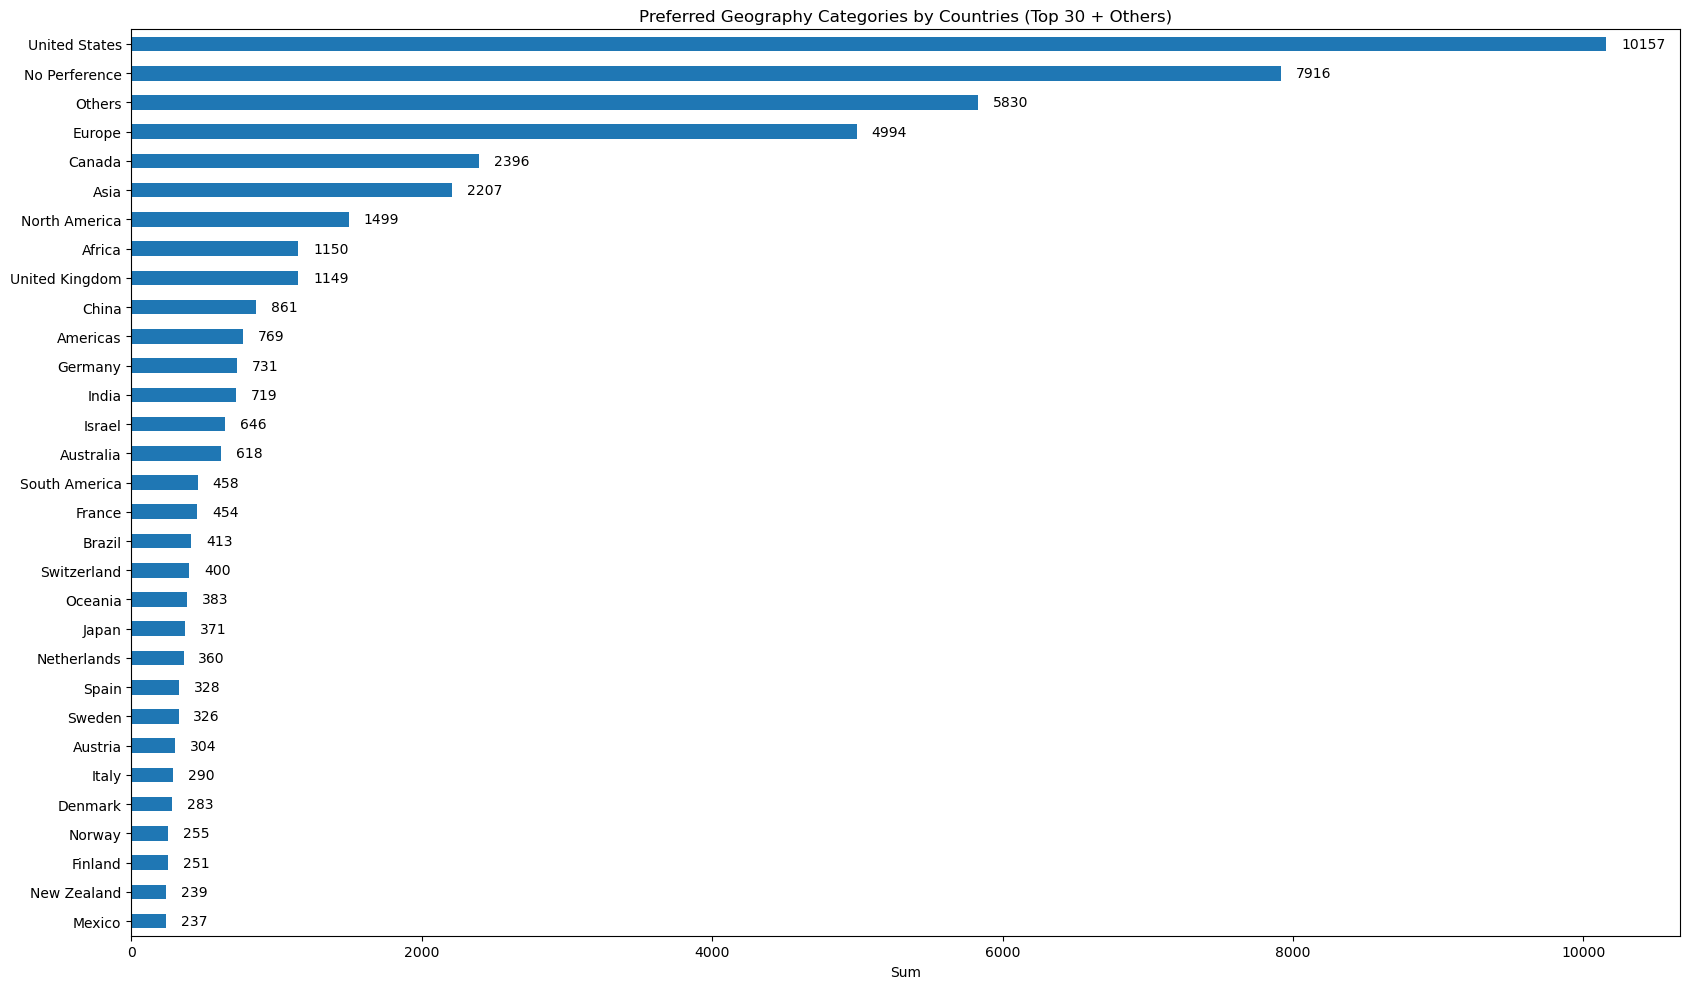

In [357]:
import matplotlib.pyplot as plt

# Get the sum for each column
col_sums = geography_encode_columns.sum()

# Get the top 30 columns
top_30 = col_sums.sort_values(ascending=False).head(30)

# Sum the rest as "Others"
others_sum = col_sums.drop(top_30.index).sum()

# Combine top 30 and "Others"
plot_data = pd.concat([top_30, pd.Series({'Others': others_sum})]).sort_values(ascending=False)

# Plot
plt.figure(figsize=(17, 10))
ax = plot_data[::-1].plot(kind='barh')  # Reverse to have largest at top
plt.xlabel('Sum')
plt.title('Preferred Geography Categories by Countries (Top 30 + Others)')
plt.tight_layout()

# Add value labels to each bar
for i, v in enumerate(plot_data[::-1]):
    ax.text(v + max(plot_data) * 0.01, i, str(v), va='center')

plt.show()


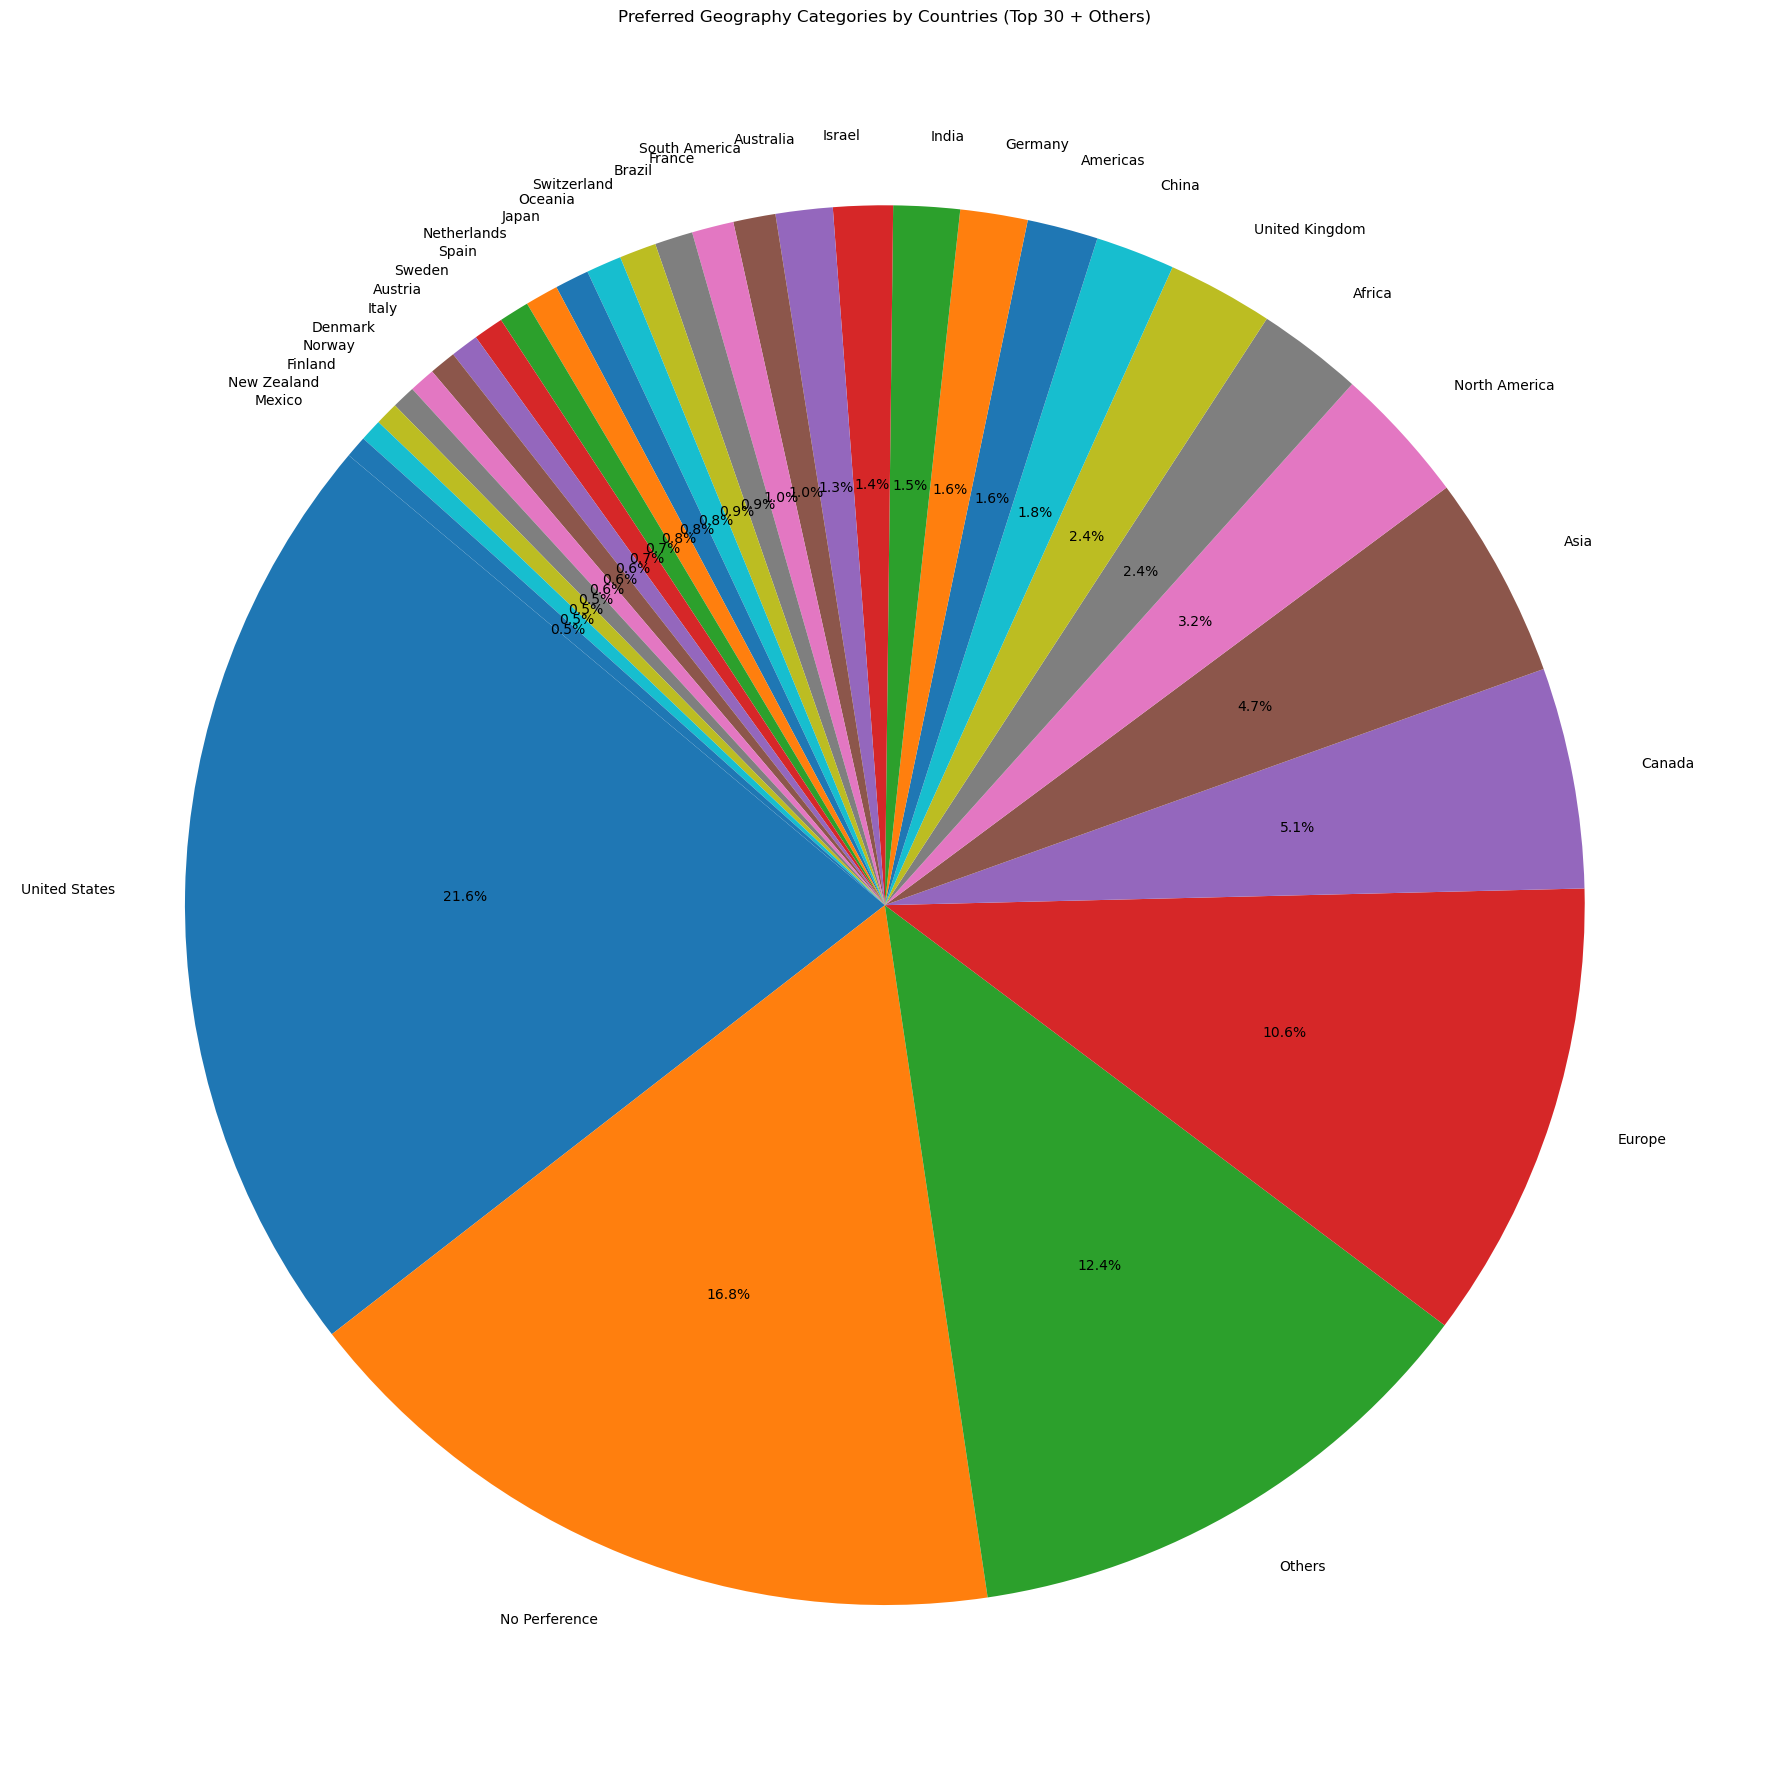

In [358]:
import matplotlib.pyplot as plt

# Pie chart for top 30 + Others
plt.figure(figsize=(18, 18))
plot_data.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    legend=False,
    ylabel=''
)
plt.title('Preferred Geography Categories by Countries (Top 30 + Others)')
plt.tight_layout()
plt.show()


In [381]:
geography_encode_columns_top30 = geography_encode_columns[top_30.index.to_list()]

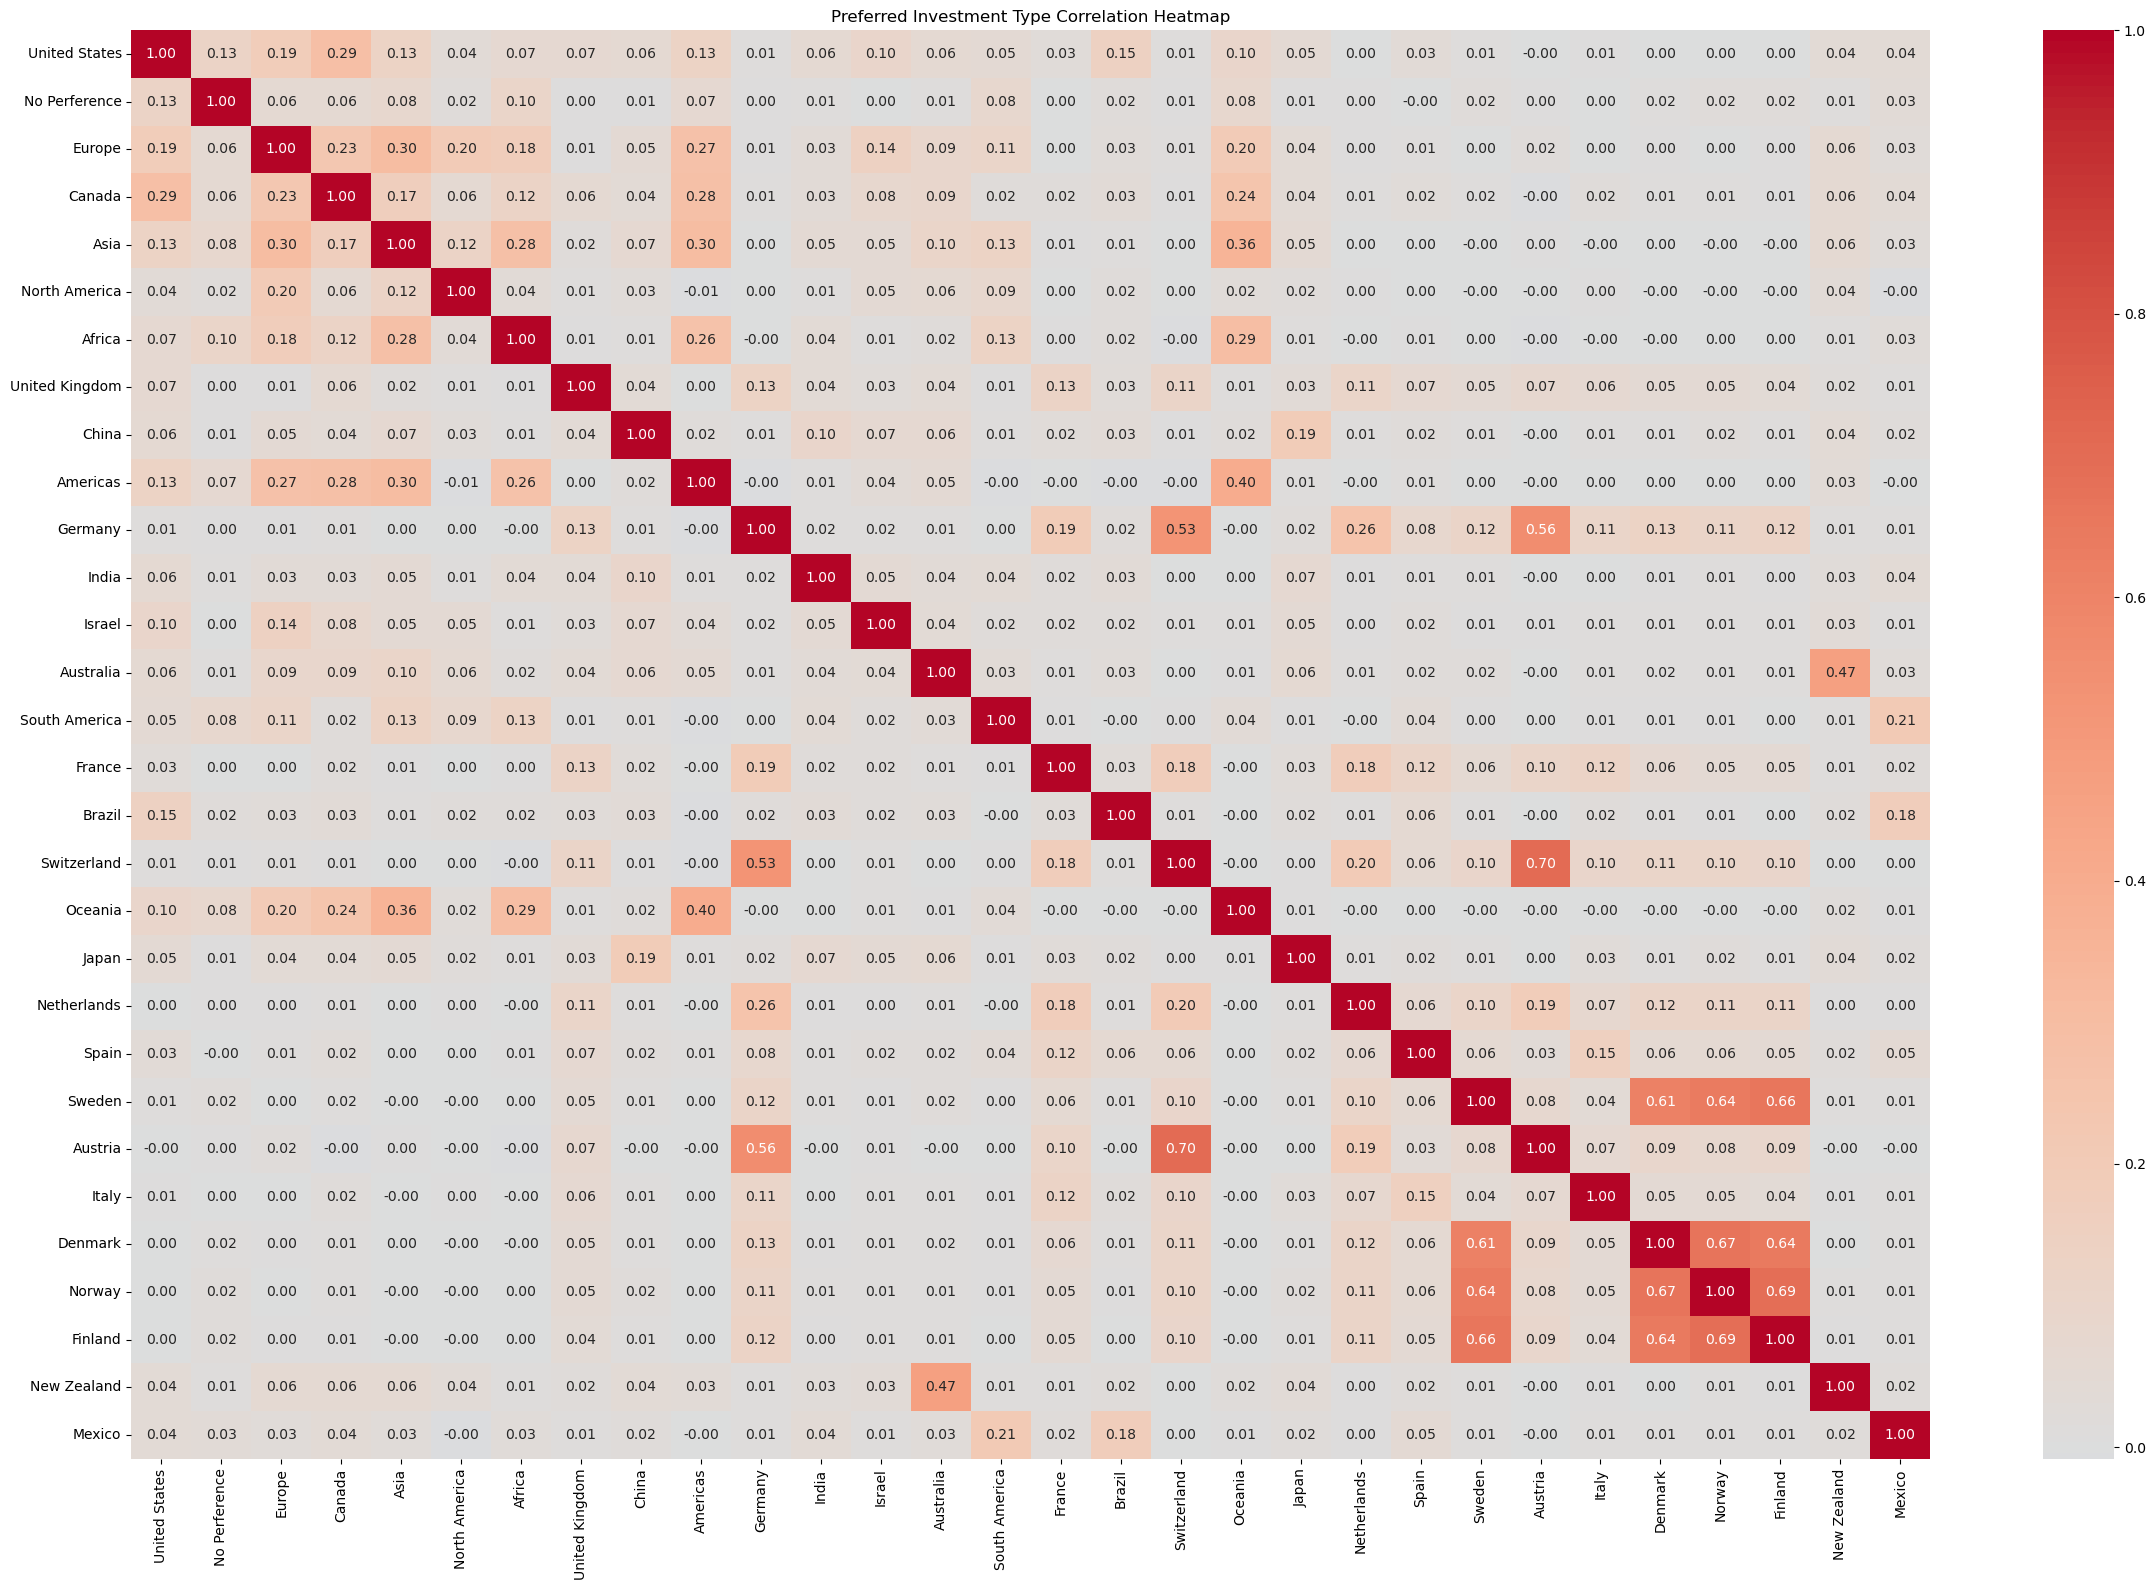

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 16))  # Enlarged figure size
corr = geography_encode_columns_top30.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Preferred Investment Type Correlation Heatmap')
plt.tight_layout()
plt.show()


Investment

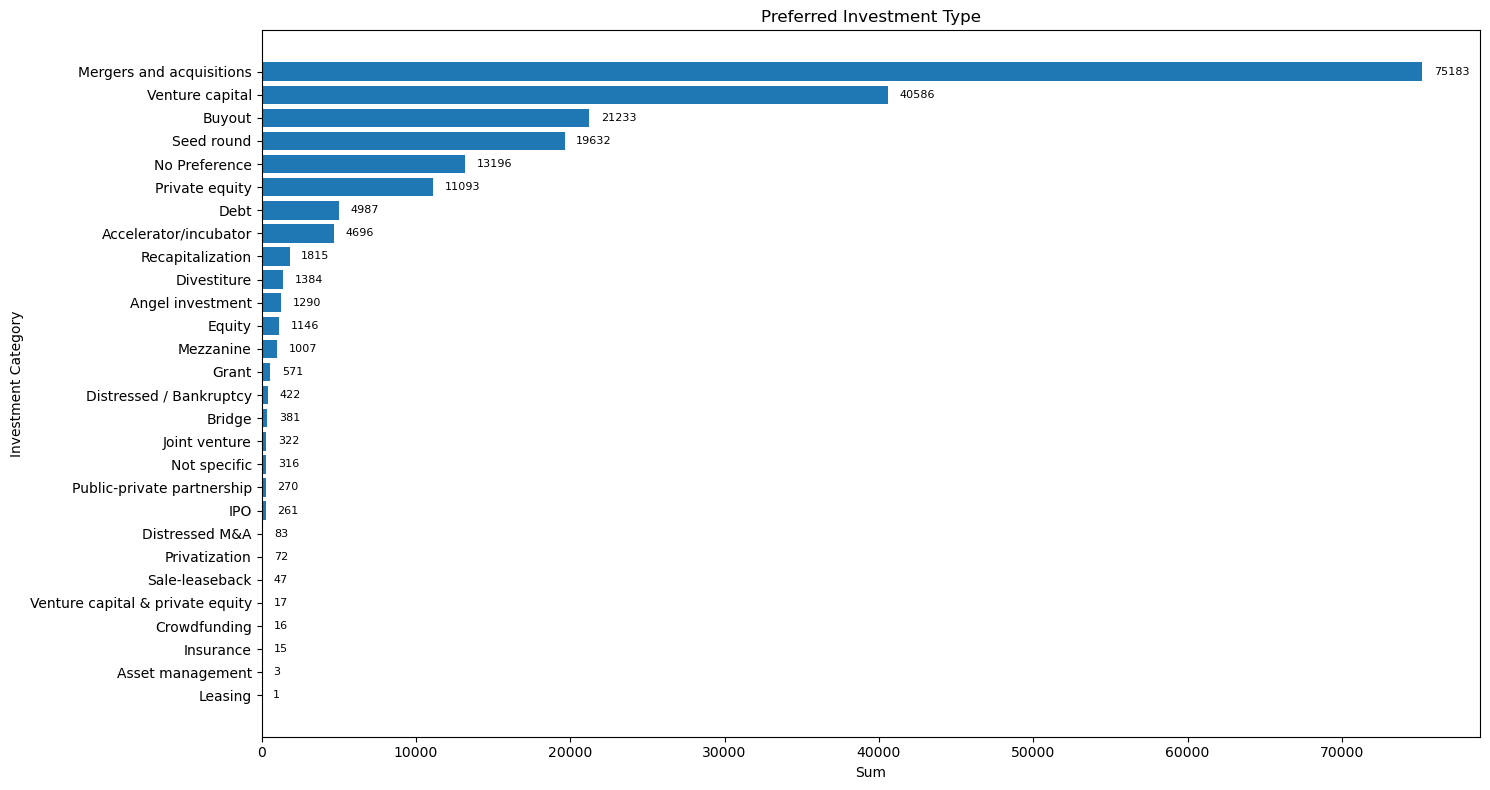

In [364]:
col_sums = investment_encode_columns.sum().sort_values(ascending=True)
plt.figure(figsize=(15, 8))
bars = plt.barh(col_sums.index, col_sums.values)
plt.yticks(rotation=0)
plt.ylabel('Investment Category')
plt.xlabel('Sum')
plt.title('Preferred Investment Type')
plt.tight_layout()

# Annotate each bar with its value
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(col_sums) * 0.01, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             va='center', fontsize=8)

plt.show()


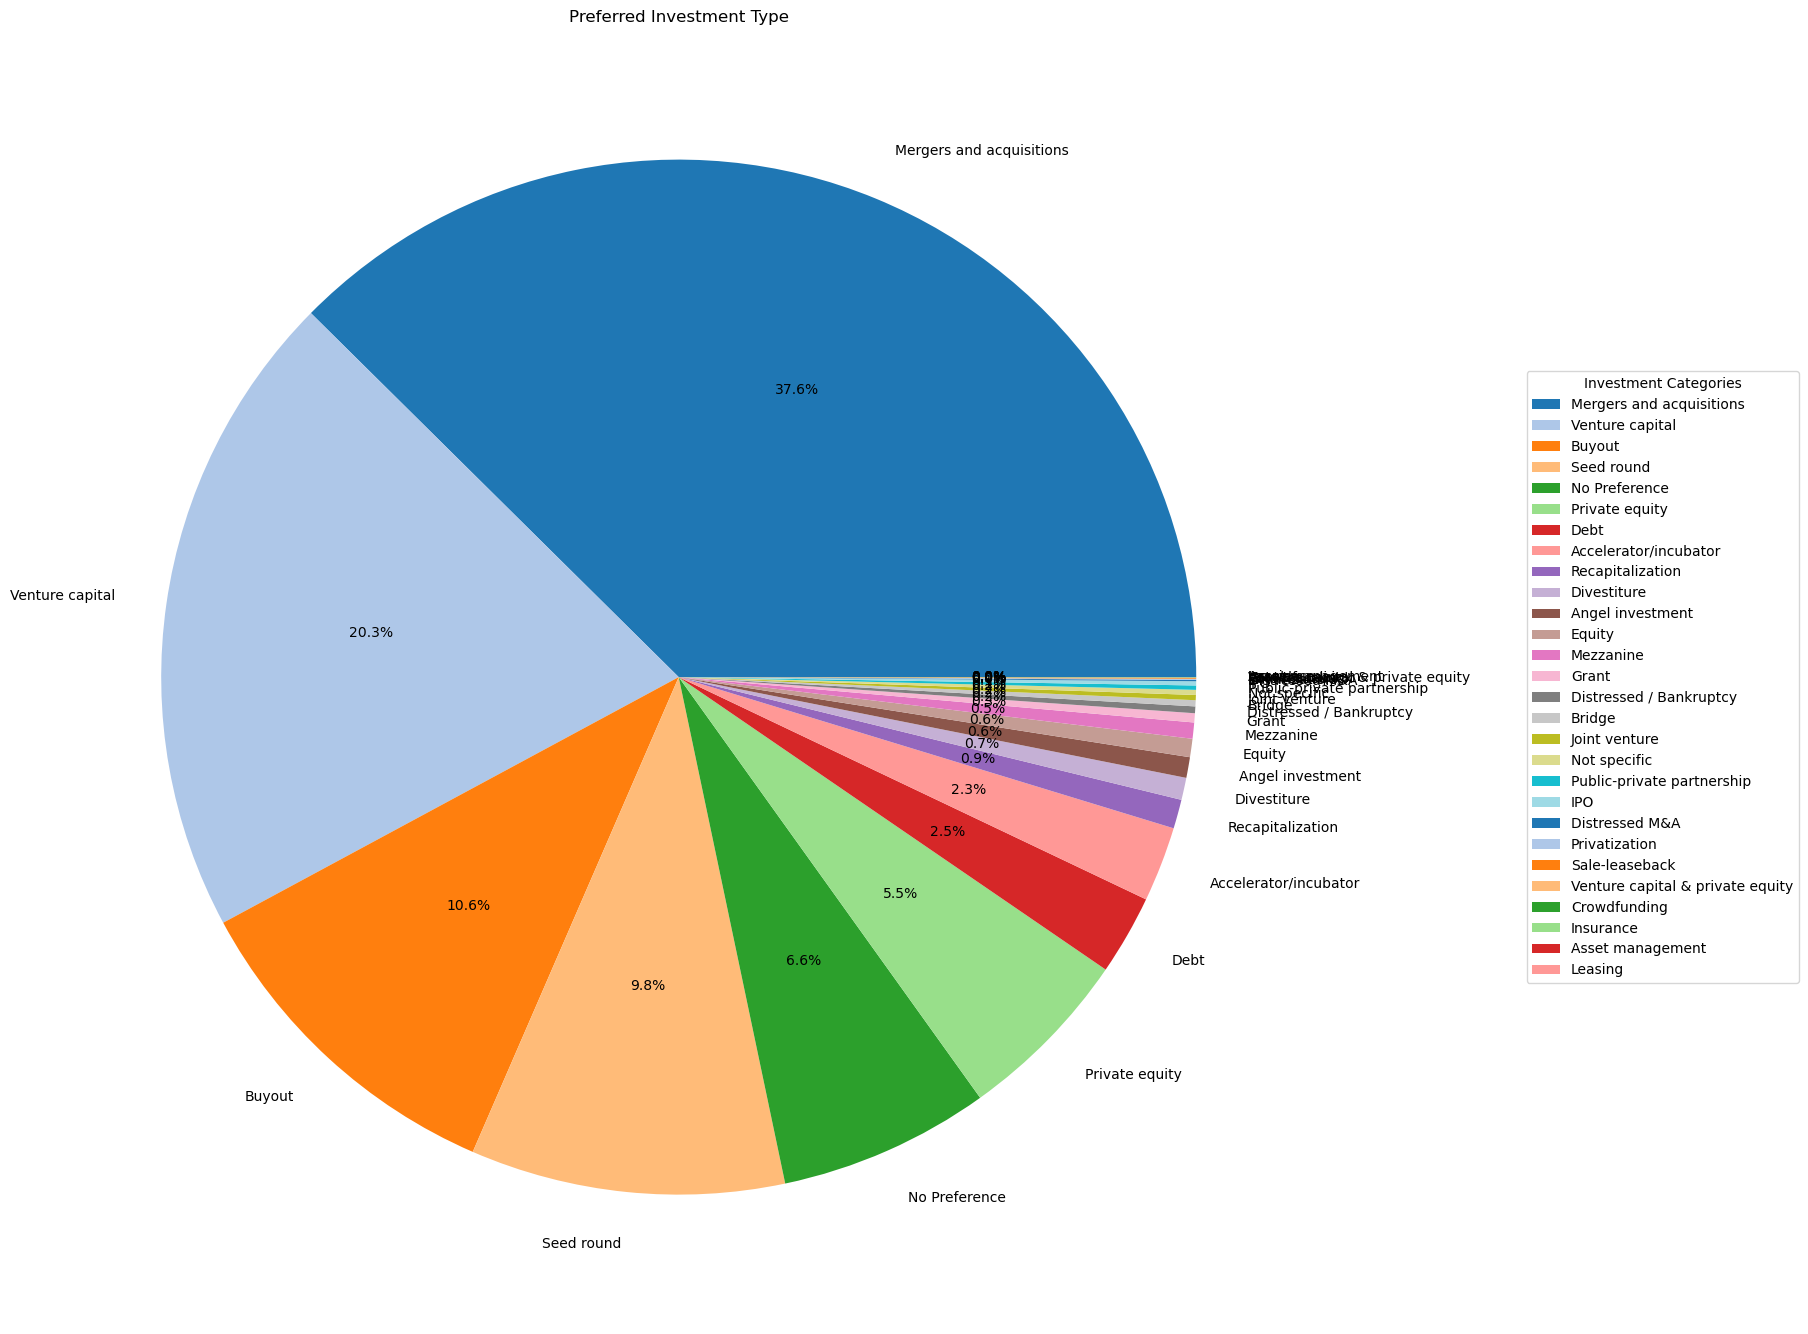

In [363]:
col_sums = investment_encode_columns.sum().sort_values(ascending=False)
plt.figure(figsize=(15, 15))
wedges, texts, autotexts = plt.pie(
    col_sums.values, 
    labels=col_sums.index, 
    autopct='%1.1f%%', 
    colors=plt.cm.tab20.colors
)
plt.title('Preferred Investment Type')
plt.tight_layout()
plt.legend(
    wedges, 
    col_sums.index, 
    title="Investment Categories", 
    bbox_to_anchor=(1.15, 0.5),  # move legend even further right
    loc="center left"
)
plt.show()


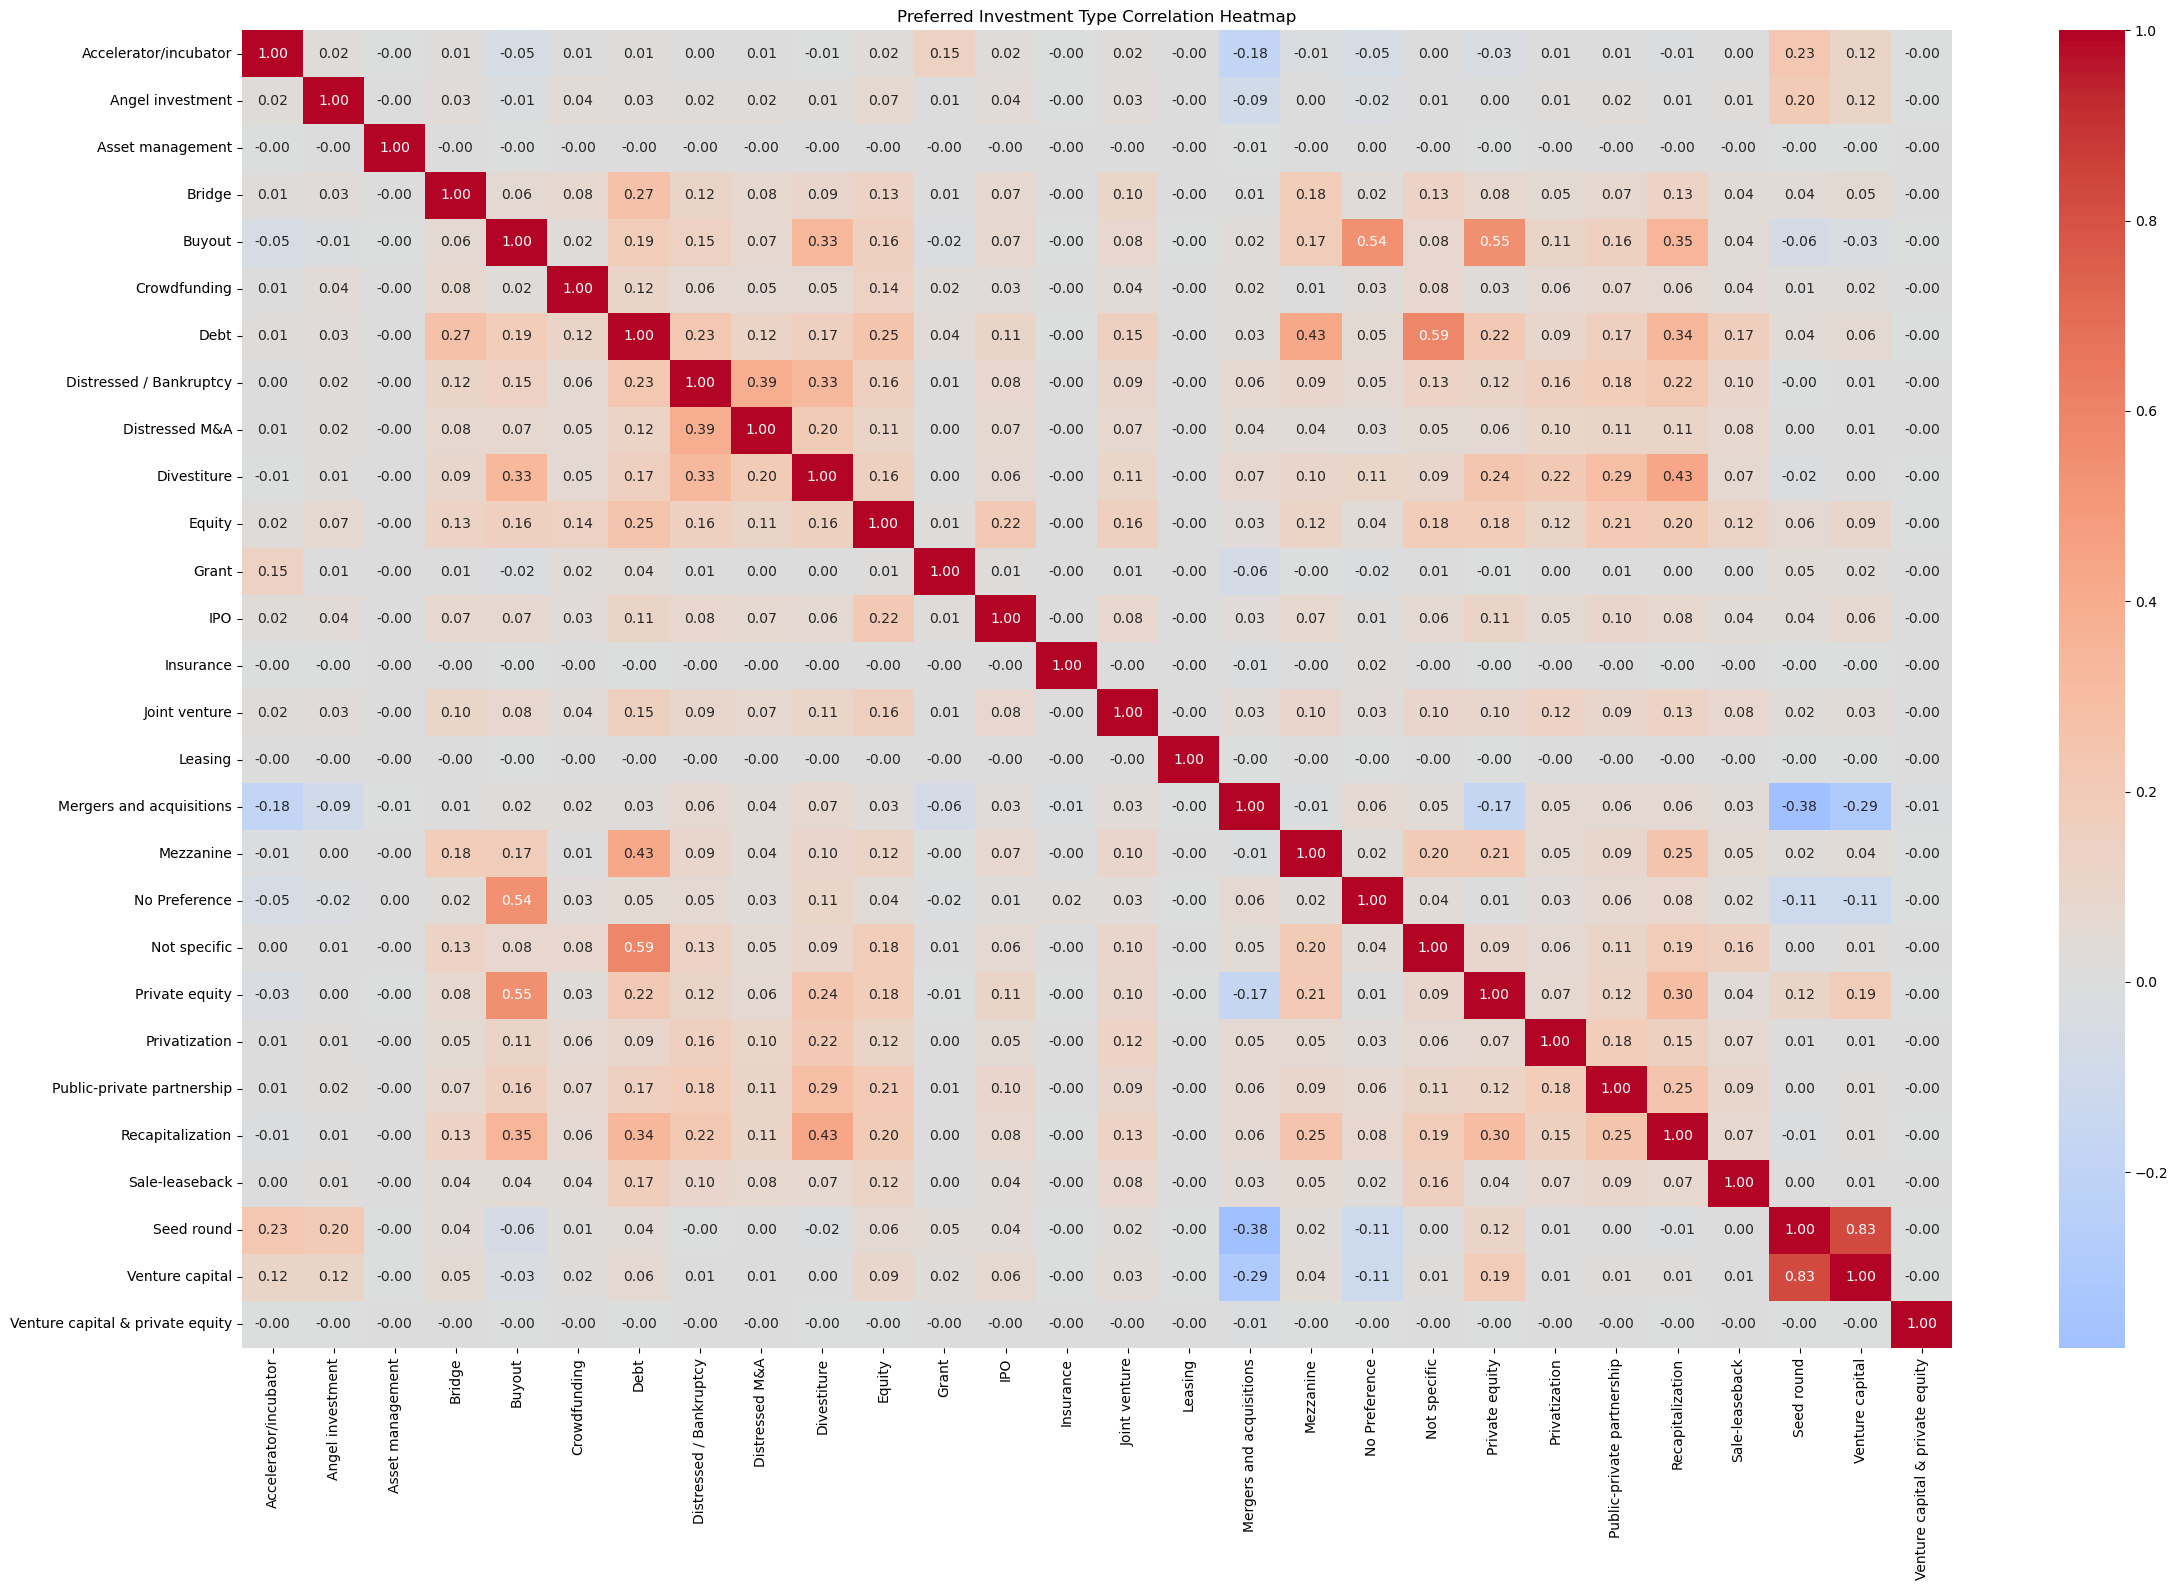

In [360]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 16))  # Enlarged figure size
corr = investment_encode_columns.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Preferred Investment Type Correlation Heatmap')
plt.tight_layout()
plt.show()


Industry

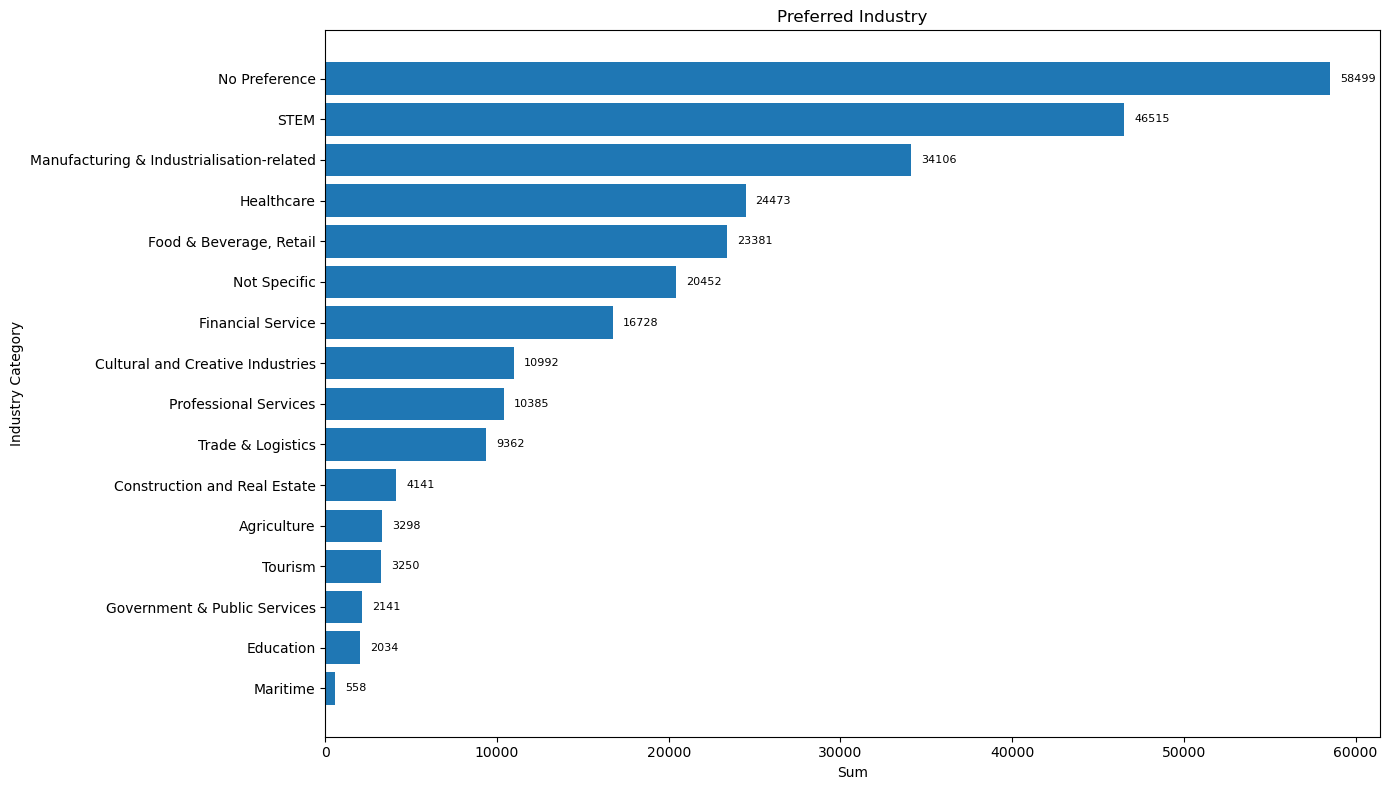

In [362]:
col_sums = industry_encode_columns.sum().sort_values(ascending=True)
plt.figure(figsize=(14, 8))
bars = plt.barh(col_sums.index, col_sums.values)
plt.yticks(rotation=0)
plt.ylabel('Industry Category')
plt.xlabel('Sum')
plt.title('Preferred Industry')
plt.tight_layout()

# Annotate each bar with its value
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(col_sums) * 0.01, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             va='center', fontsize=8)

plt.show()


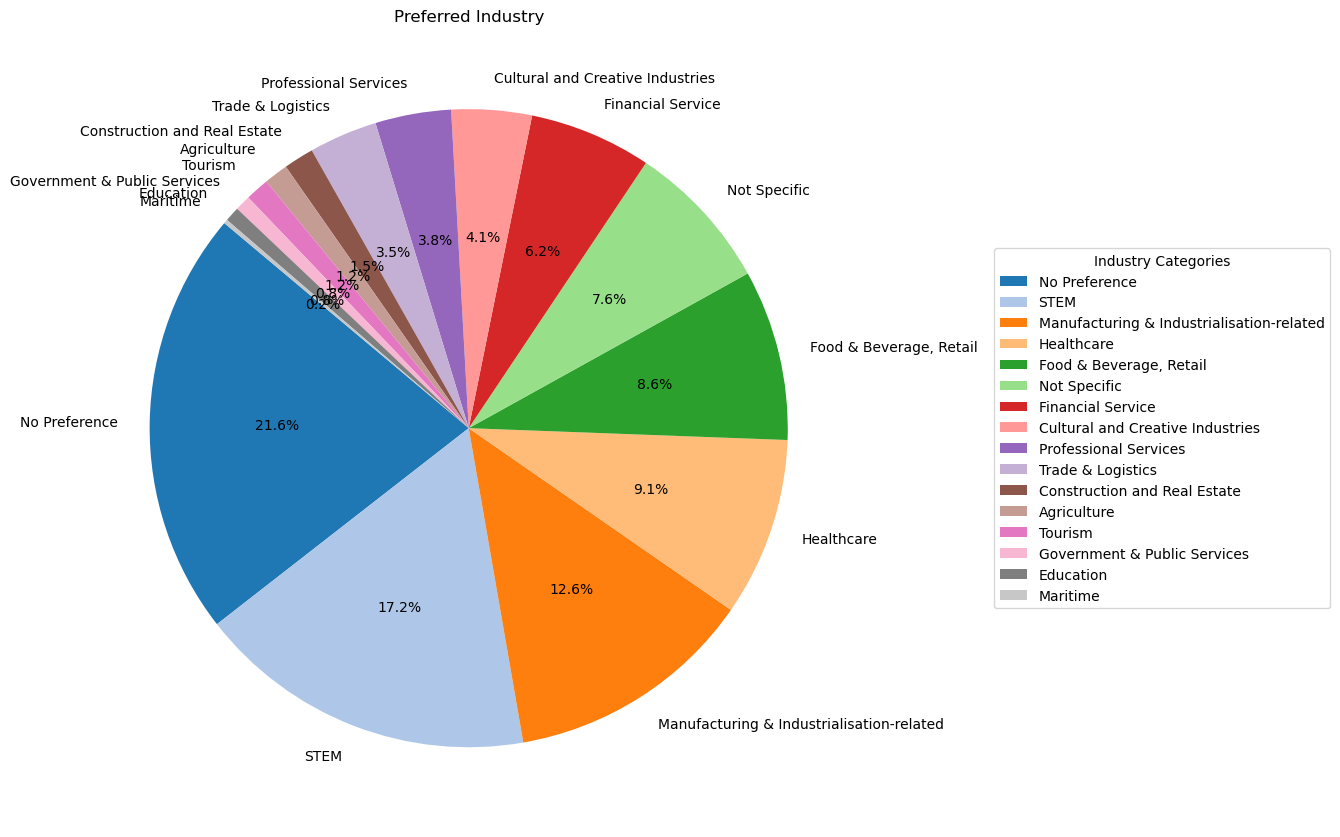

In [370]:
import matplotlib.pyplot as plt

col_sums = industry_encode_columns.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    col_sums.values,
    labels=col_sums.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title('Preferred Industry')
plt.tight_layout()
plt.legend(
    wedges,
    col_sums.index,
    title="Industry Categories",
    bbox_to_anchor=(1.15, 0.5),  # move legend further right
    loc="center left"
)
plt.show()

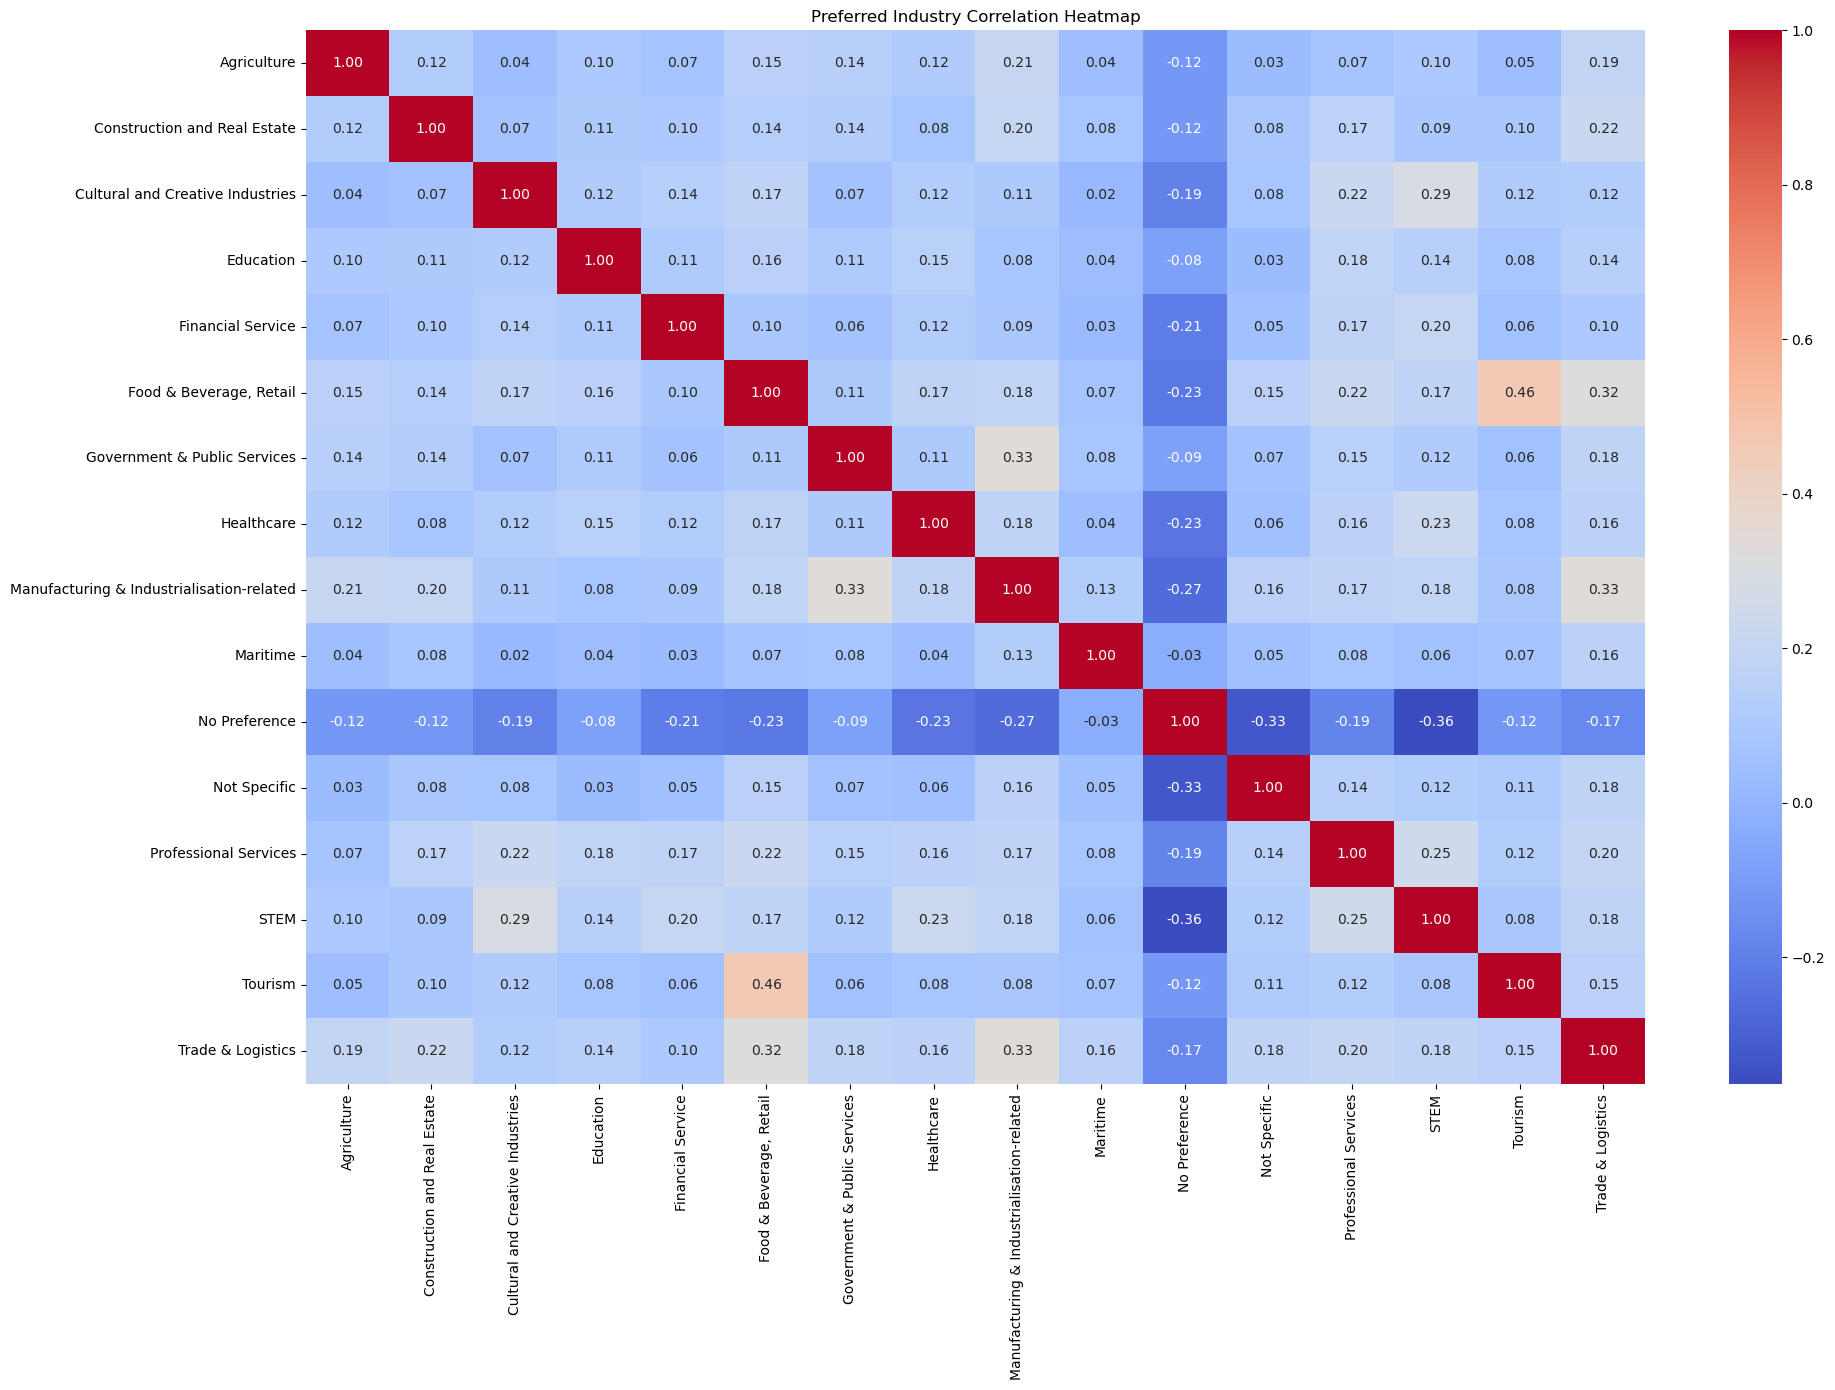

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 14))  # Enlarged figure size
sns.heatmap(industry_encode_columns.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Preferred Industry Correlation Heatmap")
plt.tight_layout()
plt.show()


### 